#DS203 Project Notebook #

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import entropy
from math import log, e
import statsmodels.api as sm
import pylab as py
import scipy as sp
from scipy import stats
from scipy.stats import lognorm, kstest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer, hinge_loss, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Data.csv')
df = df.drop(columns = ['Unnamed: 16',	'Unnamed: 17',	'Unnamed: 18'])
df['Immunization'] = df[['Immunization(DPT %)','Immunization(Measles %)']].mean(axis = 1)

In [ ]:
countries = list(df['Country'].unique())
countries.remove('High')
countries.remove('Low')
countries.remove('Middle')

bar_params = list(df.columns)
bar_params.remove('Immunization')
bar_params.remove('Year')
bar_params.remove('Country')
print(bar_params)

['Life expectancy at birth', 'Access to Electricity(%)', 'Electric power consumption(kWh/Capita)', 'Rural Population(%)', 'Food Production Index', 'GDP/Capita($)', 'Immunization(DPT %)', 'Immunization(Measles %)', 'GDP Deflator', 'Road Accident Mortality(per 100,000 people)', 'Population Density', 'Total greenhouse gas emissions (kt of CO2 equivalent)', 'Unemployed Labour(%)', 'Literacy Rate(%)']


Analysis of Variables

In [ ]:
df.dtypes

Country                                                   object
Year                                                       int64
Life expectancy at birth                                 float64
Access to Electricity(%)                                 float64
Electric power consumption(kWh/Capita)                   float64
Rural Population(%)                                      float64
Food Production Index                                    float64
GDP/Capita($)                                            float64
Immunization(DPT %)                                      float64
Immunization(Measles %)                                  float64
GDP Deflator                                             float64
Road Accident Mortality(per 100,000 people)              float64
Population Density                                       float64
Total greenhouse gas emissions (kt of CO2 equivalent)      int64
Unemployed Labour(%)                                     float64
Literacy Rate(%)         

In [ ]:
print(df.nunique())

Country                                                   15
Year                                                      15
Life expectancy at birth                                 223
Access to Electricity(%)                                 150
Electric power consumption(kWh/Capita)                   225
Rural Population(%)                                      225
Food Production Index                                    221
GDP/Capita($)                                            225
Immunization(DPT %)                                       88
Immunization(Measles %)                                   88
GDP Deflator                                             225
Road Accident Mortality(per 100,000 people)              186
Population Density                                       224
Total greenhouse gas emissions (kt of CO2 equivalent)    225
Unemployed Labour(%)                                     200
Literacy Rate(%)                                         151
Immunization            

In [ ]:
print('Means of variables:')
for i,col in enumerate(bar_params):
  print(col,':',df[col].mean())

Means of variables:
Life expectancy at birth : 70.86710761919637
Access to Electricity(%) : 87.71144870709955
Electric power consumption(kWh/Capita) : 4344.867199263596
Rural Population(%) : 34.145733820639876
Food Production Index : 87.56255555555556
GDP/Capita($) : 16438.749858911626
Immunization(DPT %) : 86.92773003679766
Immunization(Measles %) : 86.77356210792121
GDP Deflator : 7.040877659284802
Road Accident Mortality(per 100,000 people) : 18.291796113656524
Population Density : 105.6592155922241
Total greenhouse gas emissions (kt of CO2 equivalent) : 3602396.0888888887
Unemployed Labour(%) : 6.574817024684446
Literacy Rate(%) : 87.88336783406272


In [ ]:
print('Variance of variables:')
for i,col in enumerate(bar_params):
  print(col,':',df[col].var())

Variance of variables:
Life expectancy at birth : 106.17413646460045
Access to Electricity(%) : 417.188530530704
Electric power consumption(kWh/Capita) : 16829479.20995864
Rural Population(%) : 401.4427336954383
Food Production Index : 122.34026046006943
GDP/Capita($) : 334370791.6233327
Immunization(DPT %) : 258.7687853756203
Immunization(Measles %) : 237.84703483719062
GDP Deflator : 82.28192857652256
Road Accident Mortality(per 100,000 people) : 80.02035690258971
Population Density : 15307.164613727697
Total greenhouse gas emissions (kt of CO2 equivalent) : 26893195004059.633
Unemployed Labour(%) : 7.269864881059531
Literacy Rate(%) : 189.4014231429748


In [ ]:
print('Skew of variables:')
for i,col in enumerate(bar_params):
  print(col,':',df[col].skew())

Skew of variables:
Life expectancy at birth : -1.2434840996695395
Access to Electricity(%) : -1.5069400016542698
Electric power consumption(kWh/Capita) : 0.8188565199336154
Rural Population(%) : 0.7478297494473113
Food Production Index : -0.15834547229094498
GDP/Capita($) : 0.9364539476108534
Immunization(DPT %) : -2.0004215060376533
Immunization(Measles %) : -1.9088142898923441
GDP Deflator : 4.928687342880331
Road Accident Mortality(per 100,000 people) : 0.4798408810601251
Population Density : 1.3842907840166243
Total greenhouse gas emissions (kt of CO2 equivalent) : 1.7242562923707925
Unemployed Labour(%) : 1.6378272308737918
Literacy Rate(%) : -1.1628444411385248


In [ ]:
print('Min & Max of variables:')
for i,col in enumerate(bar_params):
  print(col,':',df[col].min(),',',df[col].max())

Min & Max of variables:
Life expectancy at birth : 43.065 , 83.5878
Access to Electricity(%) : 32.3 , 100.0
Electric power consumption(kWh/Capita) : 74.49061999999999 , 13704.58
Rural Population(%) : 8.696 , 72.333
Food Production Index : 56.62 , 121.32
GDP/Capita($) : 356.6932 , 68150.11
Immunization(DPT %) : 25.0 , 99.0
Immunization(Measles %) : 30.0 , 99.0
GDP Deflator : -2.017678703 , 95.40865975
Road Accident Mortality(per 100,000 people) : 2.9 , 41.0
Population Density : 2.493134 , 435.7612
Total greenhouse gas emissions (kt of CO2 equivalent) : 24150 , 19964160
Unemployed Labour(%) : 2.63 , 20.52
Literacy Rate(%) : 51.07765961 , 99.704997355469


###Low Income Countries###

In [ ]:
low_income_countries = ['India', 'Iran', 'Nigeria', 'Zimbabwe']
high_income_countries = ['UK', 'USA', 'Australia', 'Japan']
middle_income_countries = ['Russia', 'Colombia', 'Brazil', 'Mexico']
line_params          = ['Life expectancy at birth','GDP/Capita($)', 'GDP Deflator', 'Unemployed Labour(%)', 'Population Density', 'Immunization' ]
years                = df['Year'].unique()

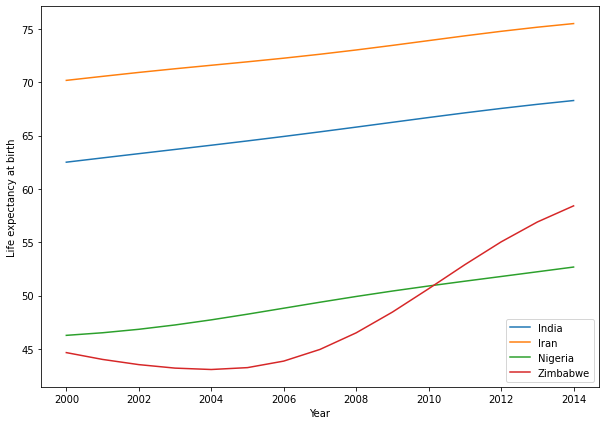

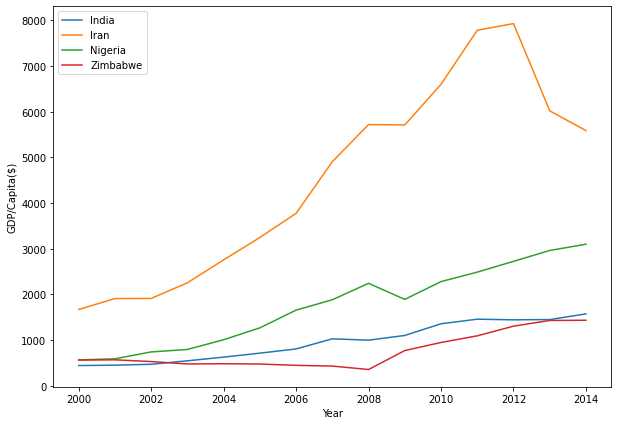

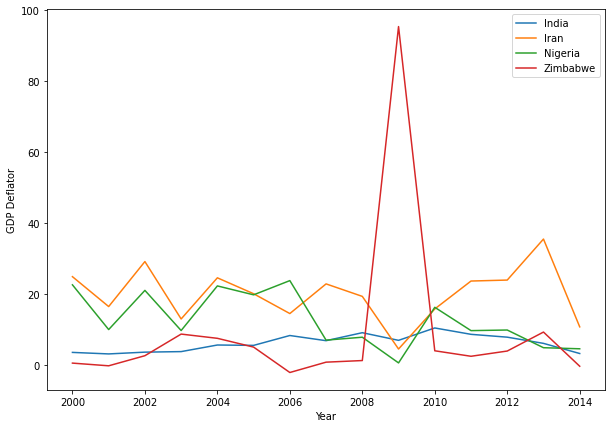

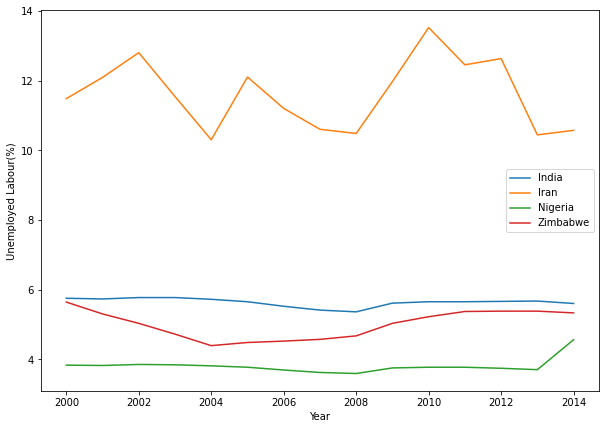

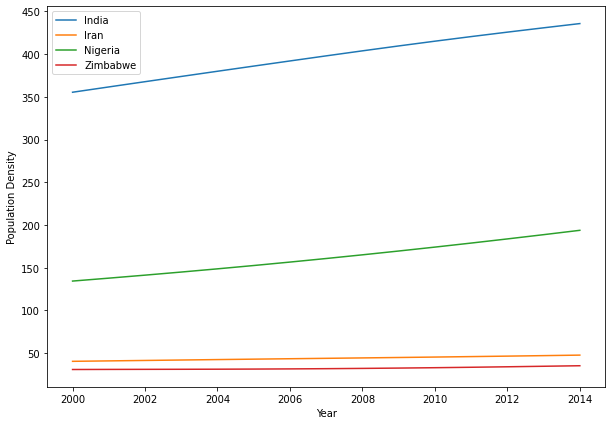

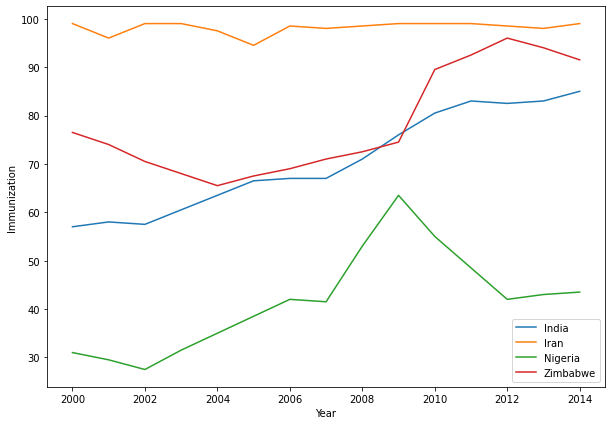

<IPython.core.display.Javascript object>

In [ ]:
for param in line_params:
  plt.figure(figsize=(10,7))
  for country in low_income_countries:
    df_i = df[df['Country']==country]
    plt.plot(years,df_i[param], label = country)
    plt.xlabel('Year')
    plt.ylabel(param)
    plt.legend()
  plt.show()
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

### Middle Income Countries

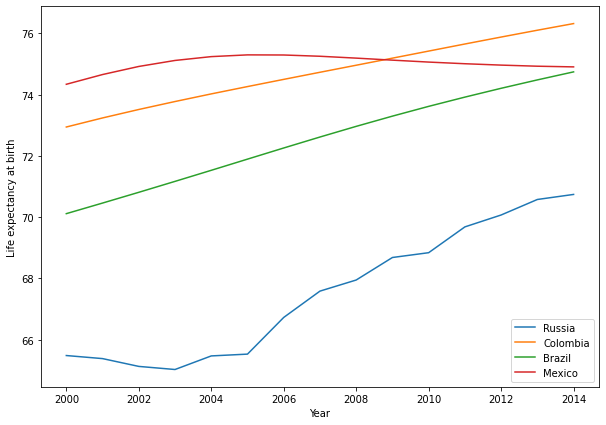

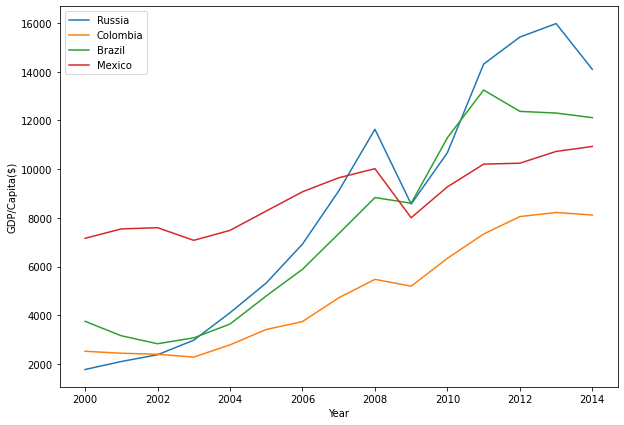

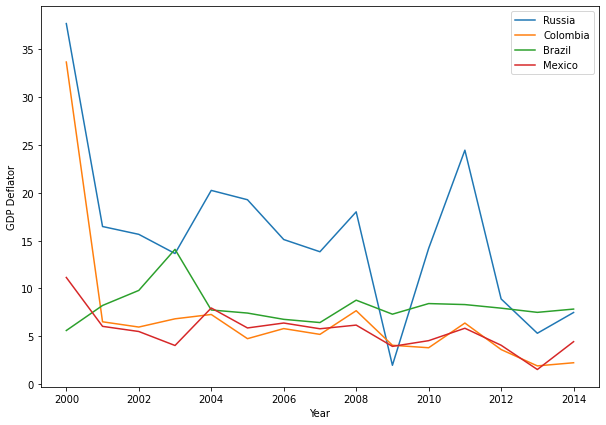

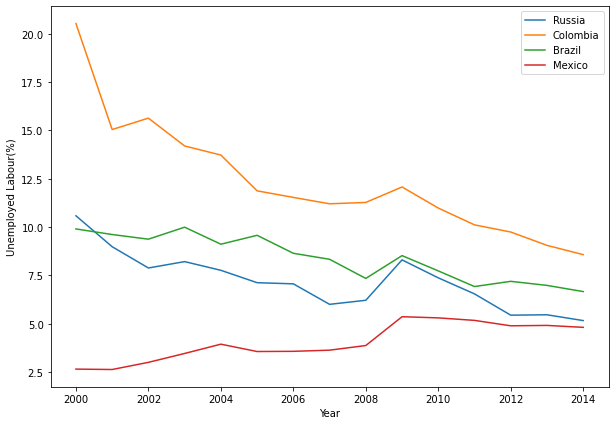

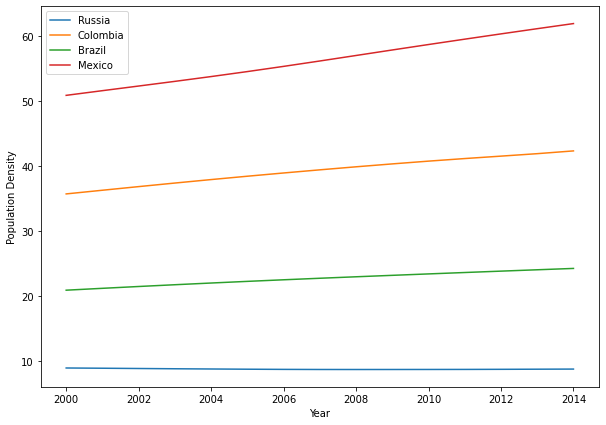

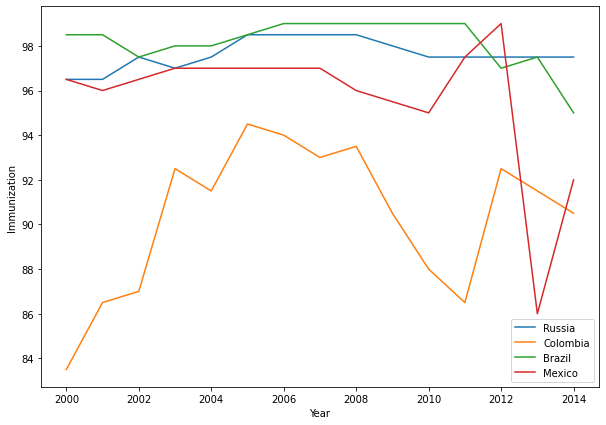

<IPython.core.display.Javascript object>

In [ ]:
for param in line_params:
  plt.figure(figsize=(10,7))
  for country in middle_income_countries:
    df_i = df[df['Country']==country]
    plt.plot(years,df_i[param], label = country)
    plt.xlabel('Year')
    plt.ylabel(param)
    plt.legend()
  plt.show()
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

### High Income Countries

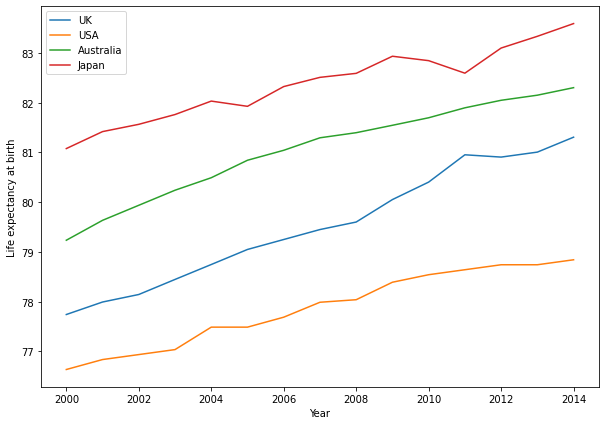

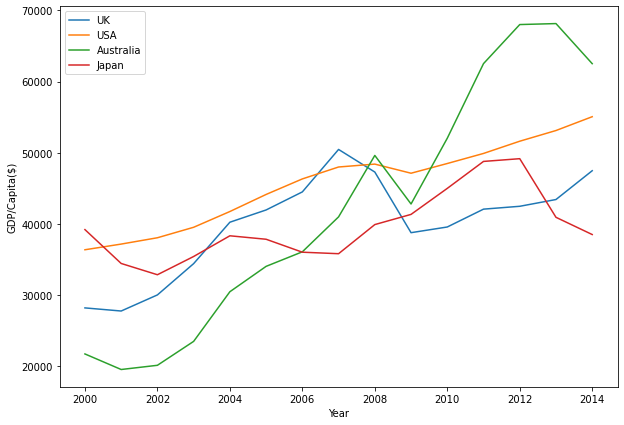

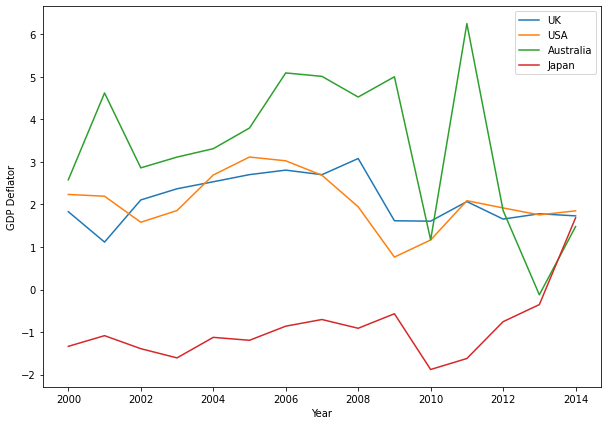

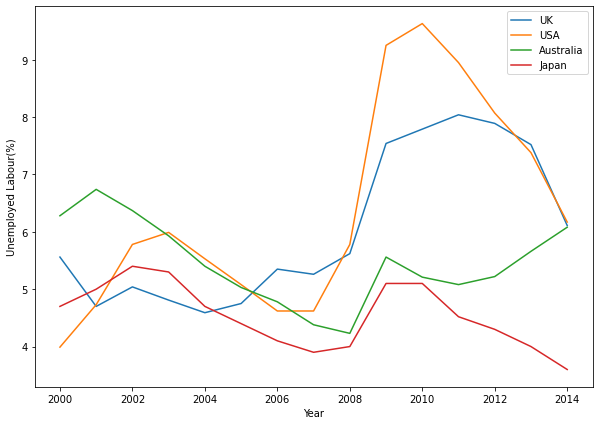

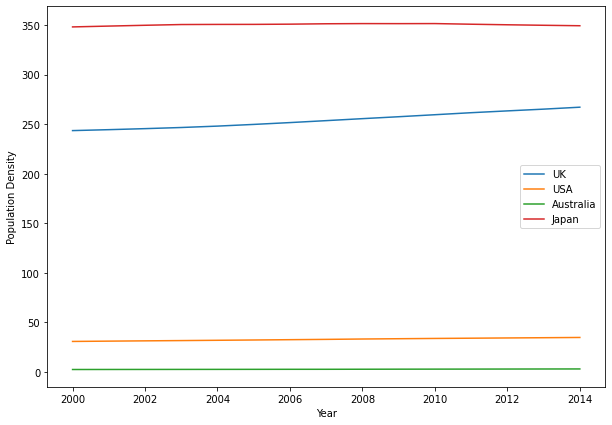

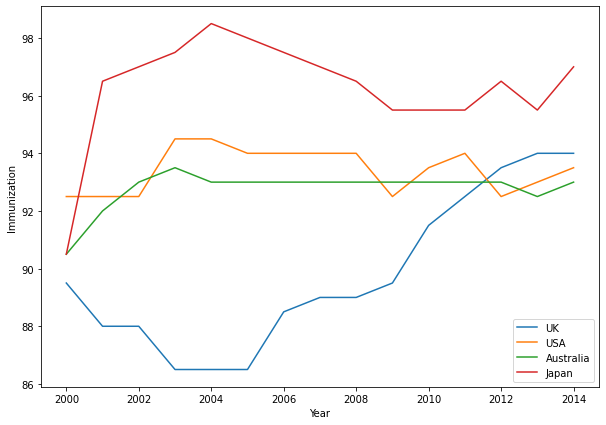

<IPython.core.display.Javascript object>

In [ ]:
for param in line_params:
  plt.figure(figsize=(10,7))
  for country in high_income_countries:
    df_i = df[df['Country']==country]
    plt.plot(years,df_i[param], label = country)
    plt.xlabel('Year')
    plt.ylabel(param)
    plt.legend()
  plt.show()

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

###Average Value for parameters for each country from 2000-2014###

<IPython.core.display.Javascript object>

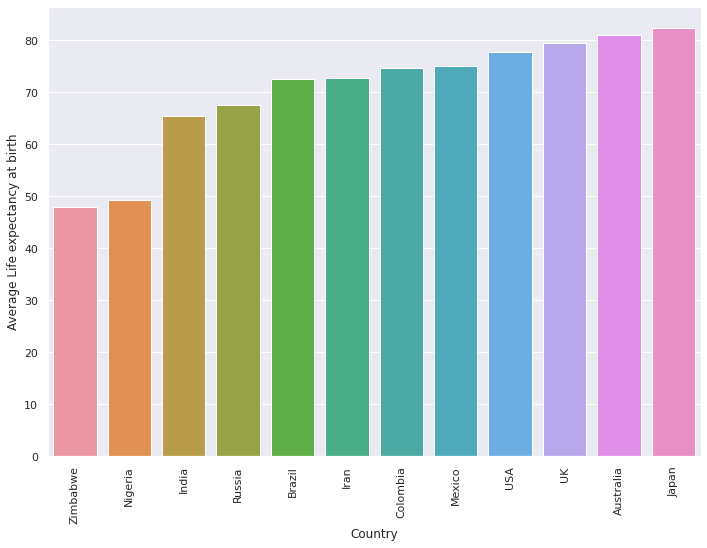

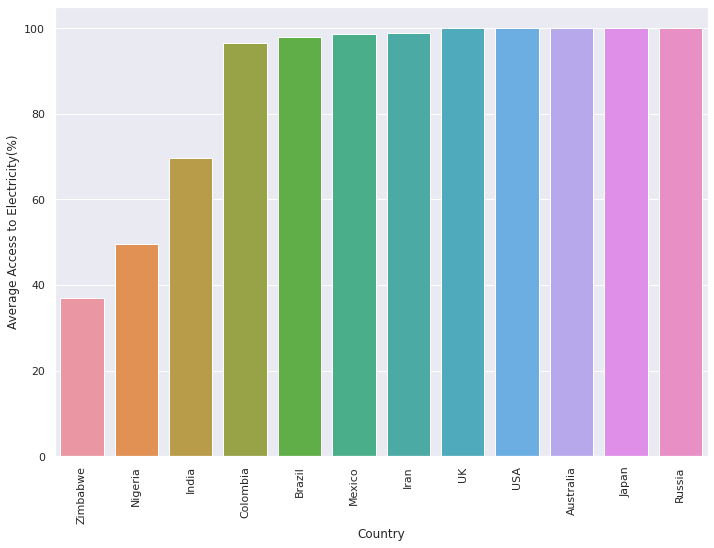

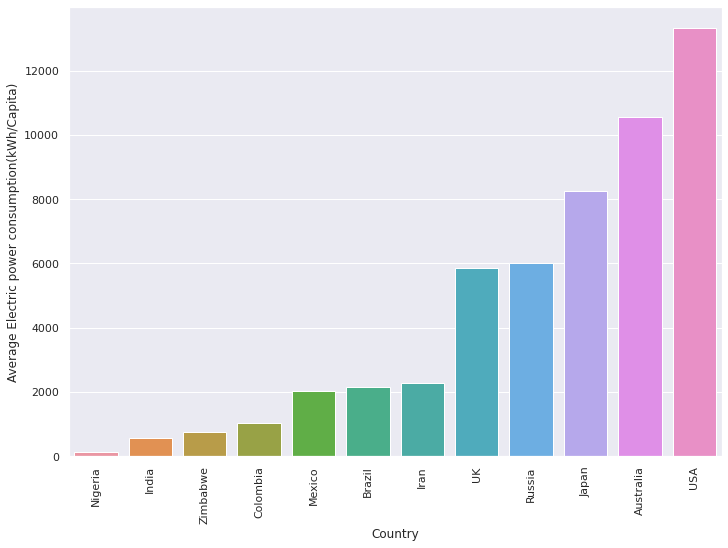

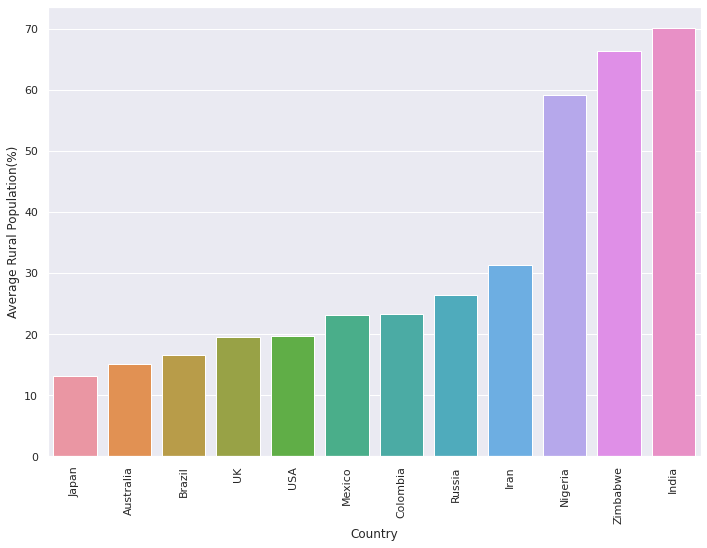

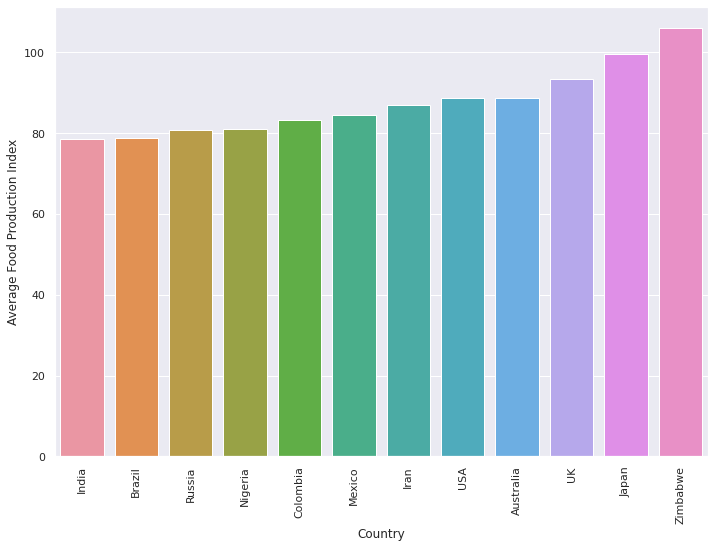

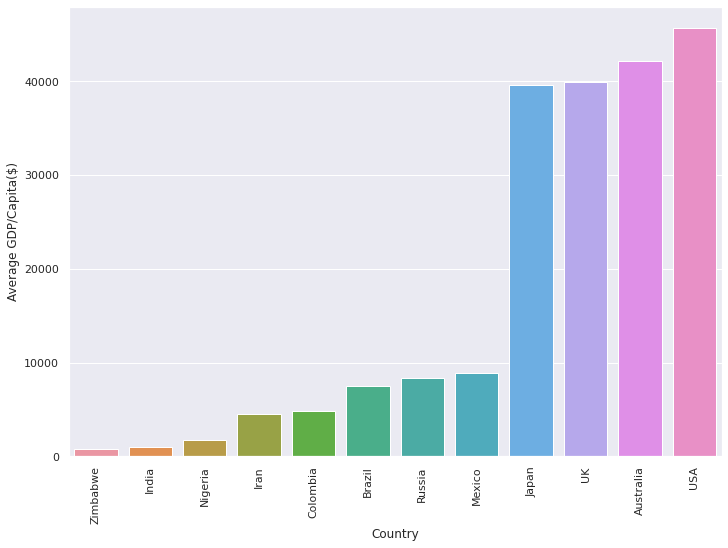

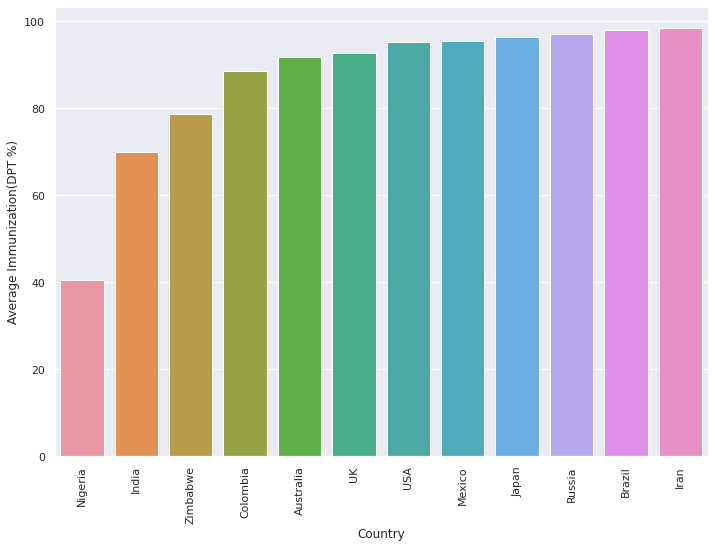

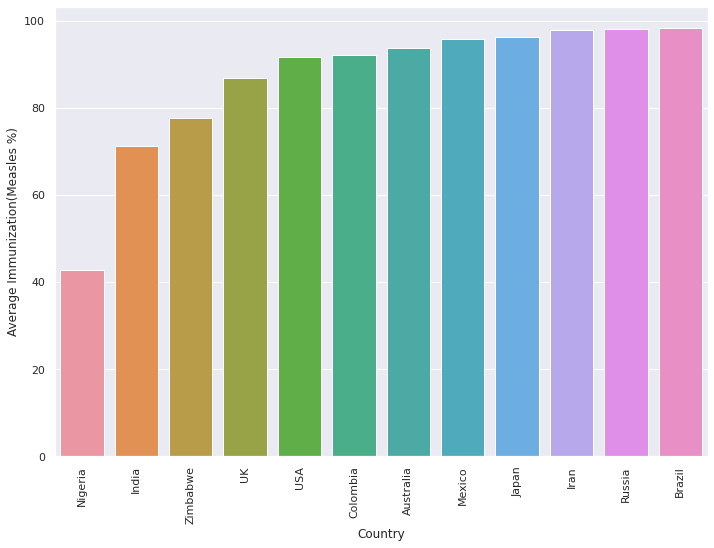

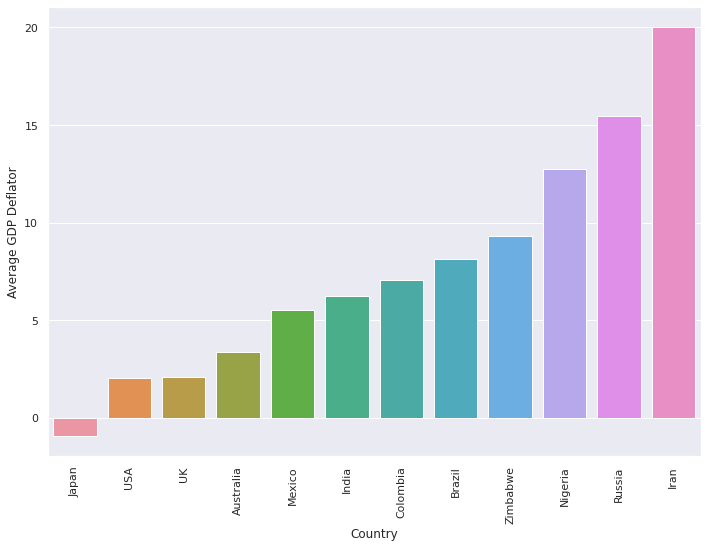

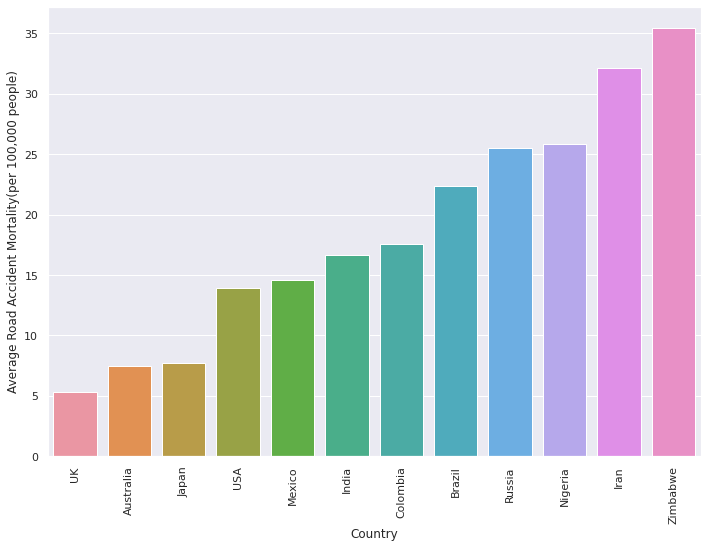

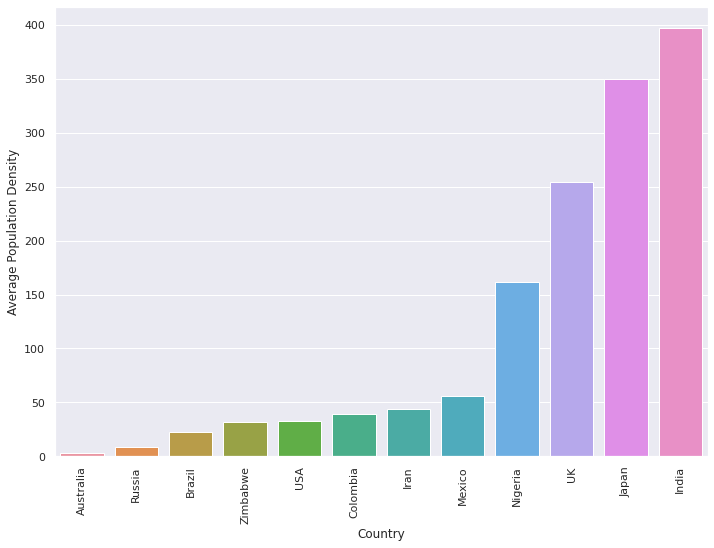

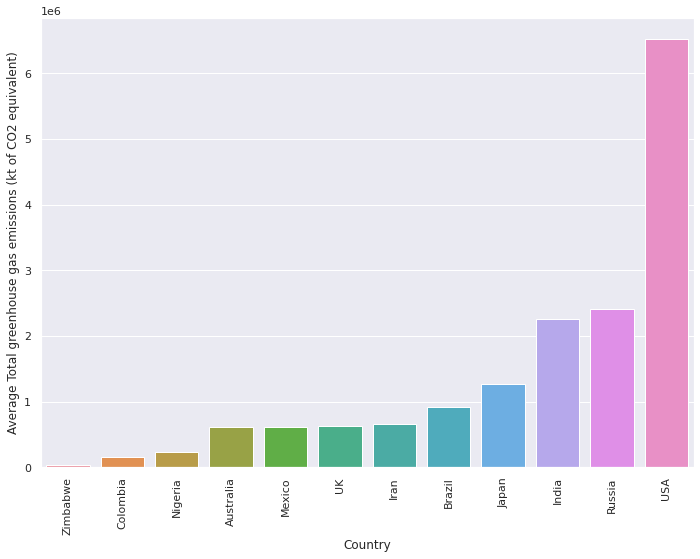

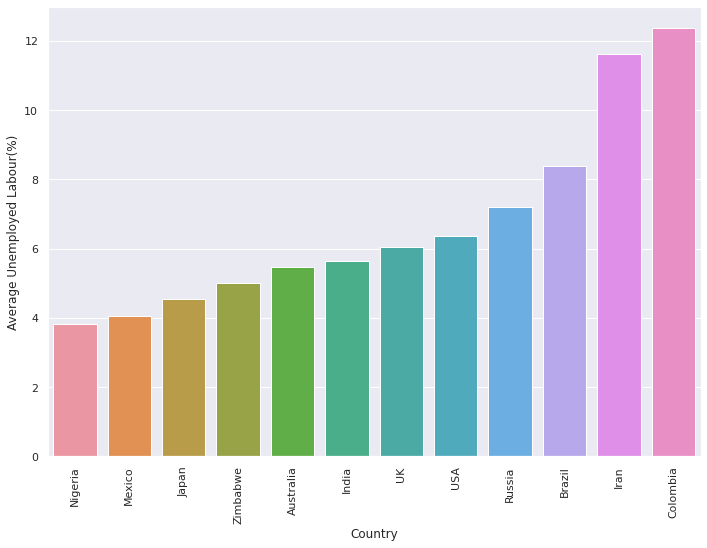

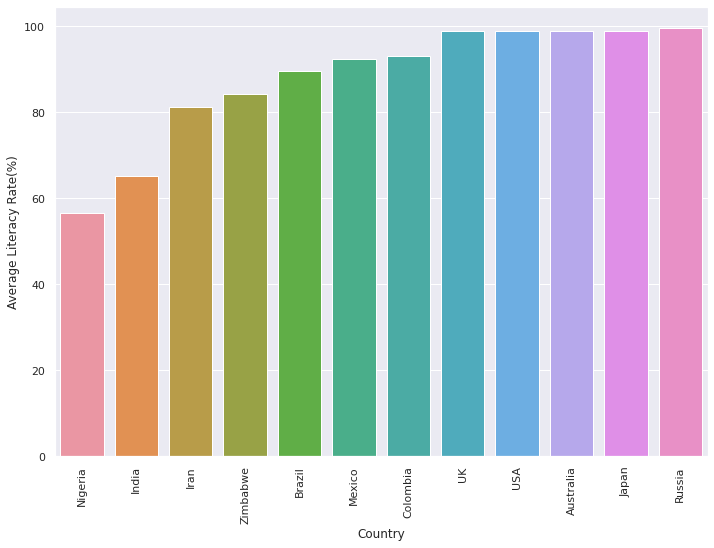

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in bar_params:
  plt.plot()
  param_value = {}
  for m in countries:
    df_country = df[df['Country']==m]
    param_value[m] = df_country[i].mean()
    param_value = dict(sorted(param_value.items(), key=lambda item: item[1]))
  sns.barplot(x=list(param_value.keys()),y=list(param_value.values()) )
  plt.xlabel('Country')
  plt.xticks(rotation = 90)
  plt.ylabel('Average '+ i)
  plt.show()

##Overall Analaysis for High, Low, and Middle Income Countries##

In [ ]:
df_high_overall = df[df['Country']=='High'].copy()
df_middle_overall = df[df['Country']=='Middle'].copy()
df_low_overall = df[df['Country']=='Low'].copy()

df_comp=df_high_overall.append(df_middle_overall).append(df_low_overall)
df_comp['Immunization'] = df_comp[['Immunization(DPT %)', 'Immunization(Measles %)']].mean(axis=1)

<IPython.core.display.Javascript object>

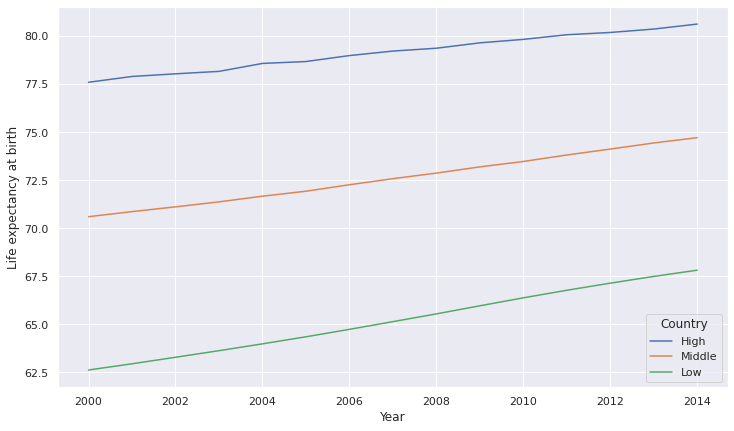

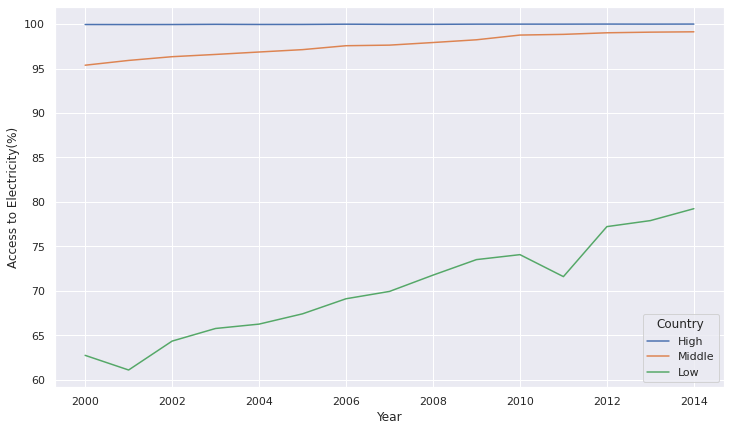

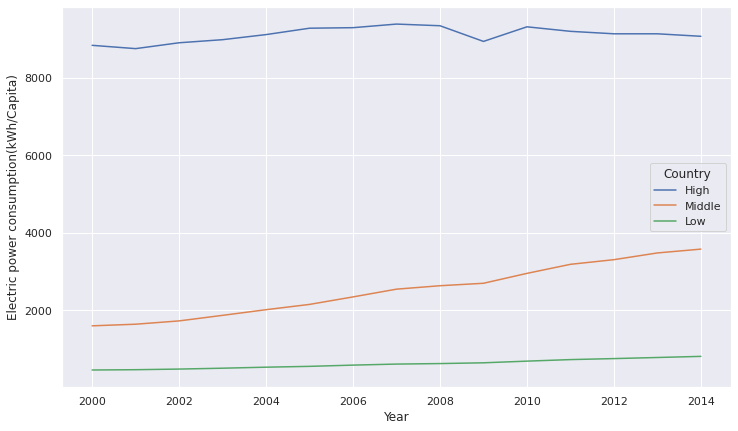

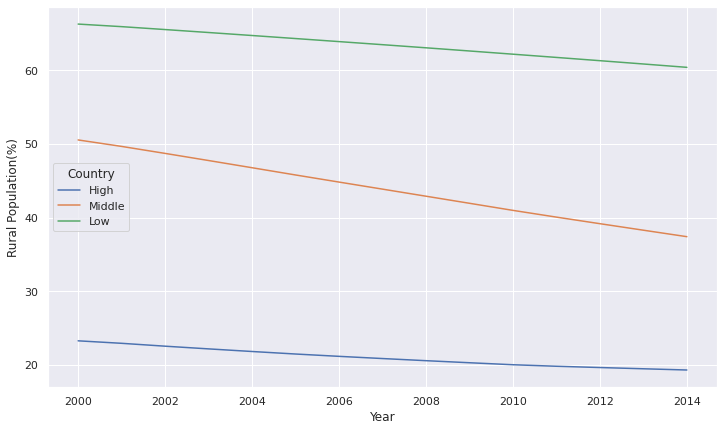

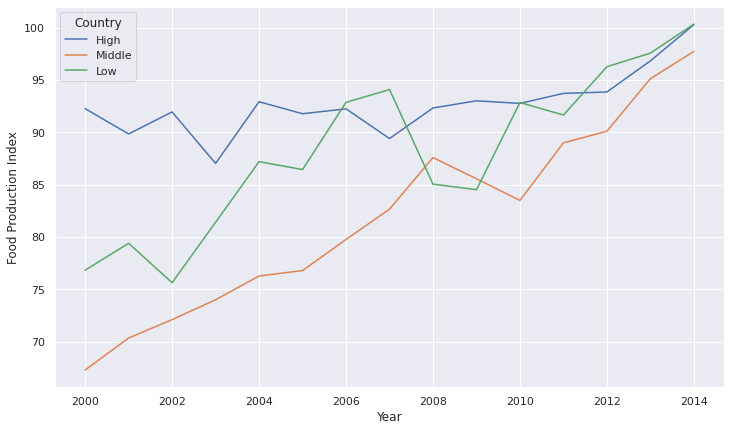

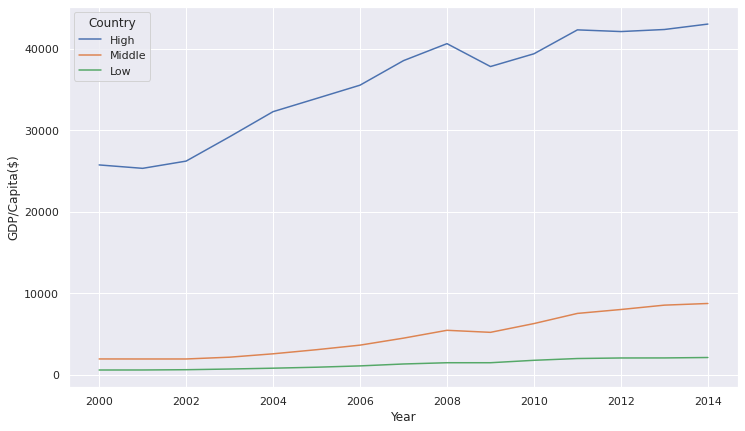

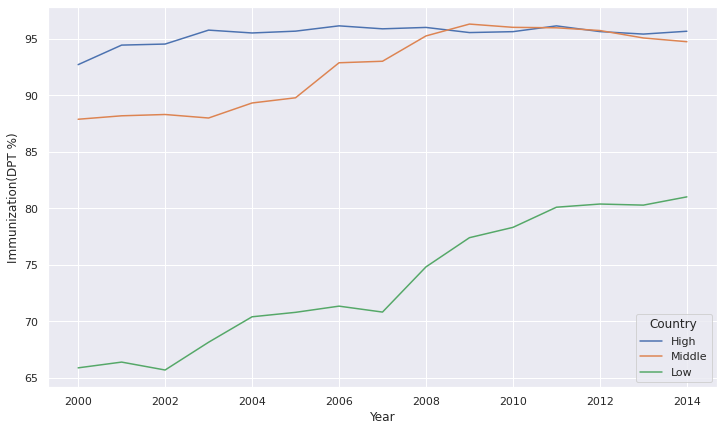

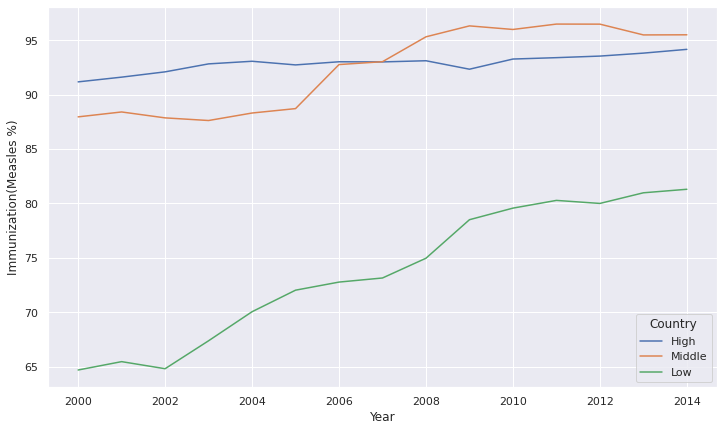

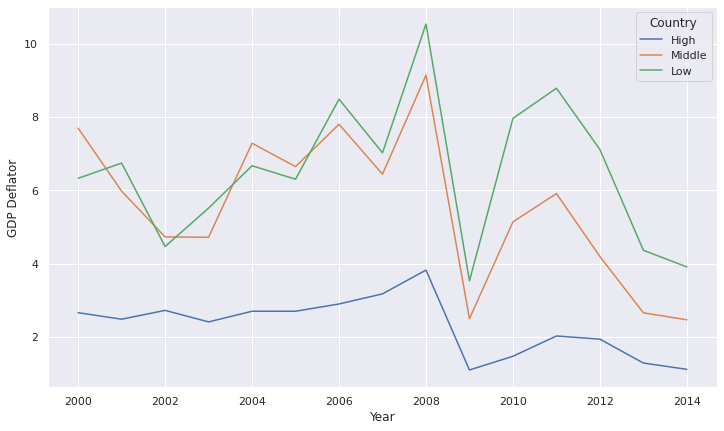

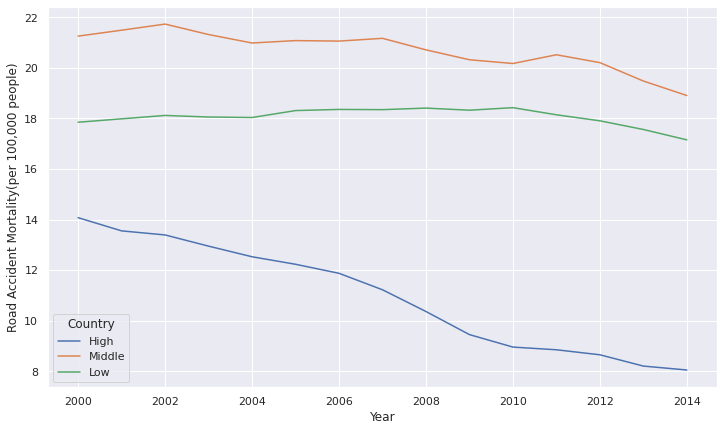

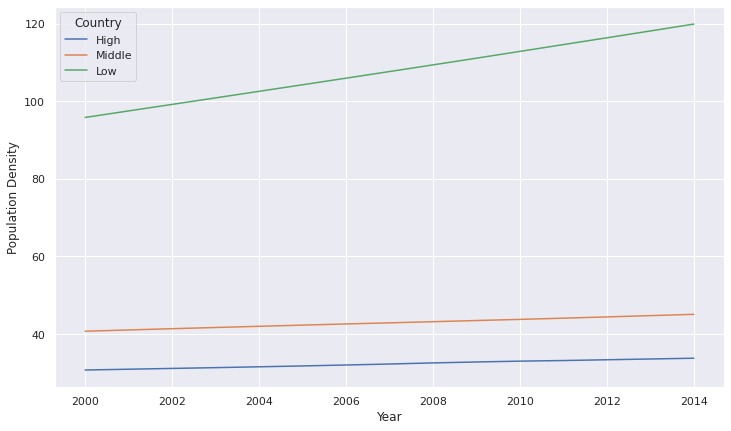

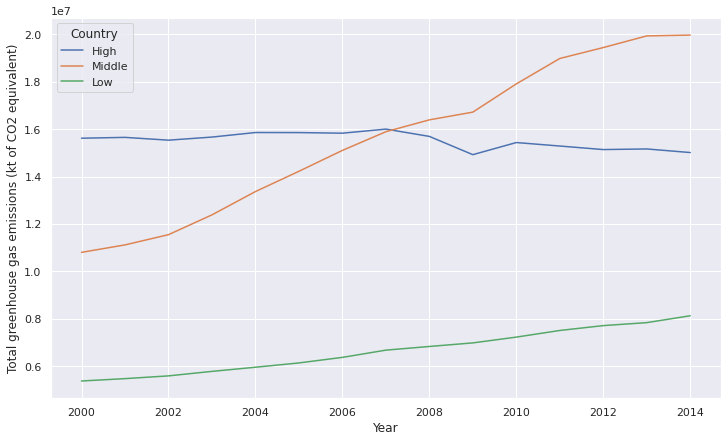

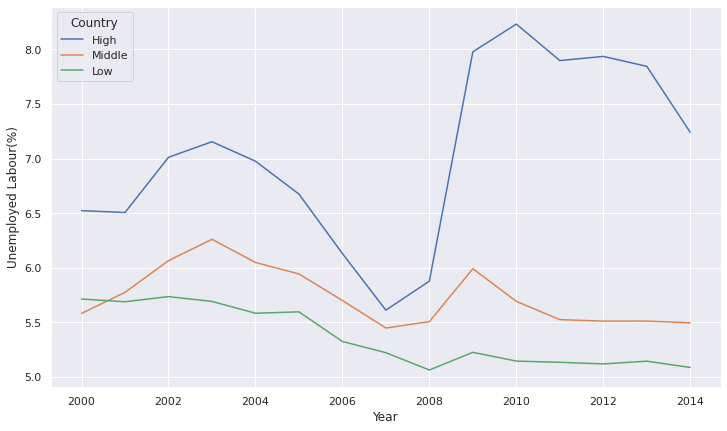

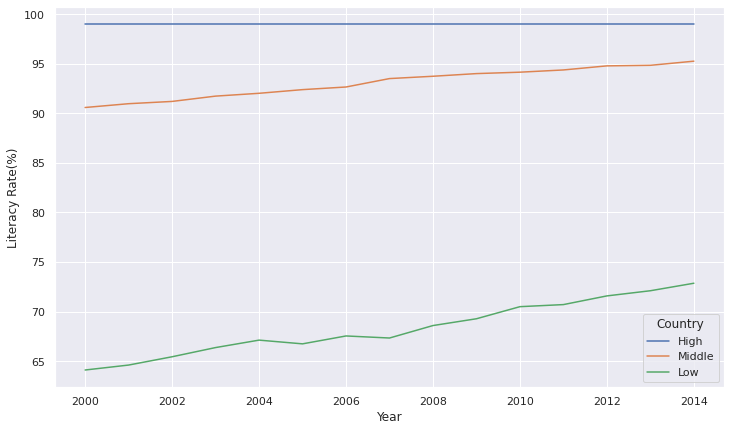

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

for i,col in enumerate(bar_params):
  fig = plt.figure(figsize=(12,7))
  sns.lineplot(data=df_comp, x="Year", y=col,hue="Country")

In [ ]:
loop_params = ['Rural Population(%)', 'Life expectancy at birth']

In [ ]:
# Reference: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
import matplotlib.patheffects as path_effects
def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='normal', color='white')
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

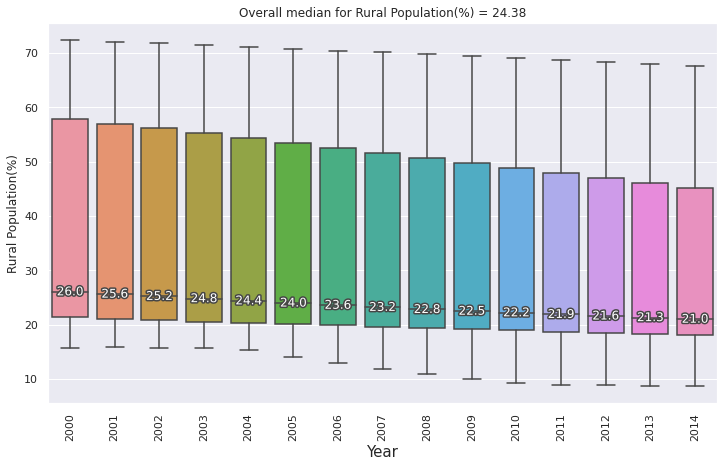

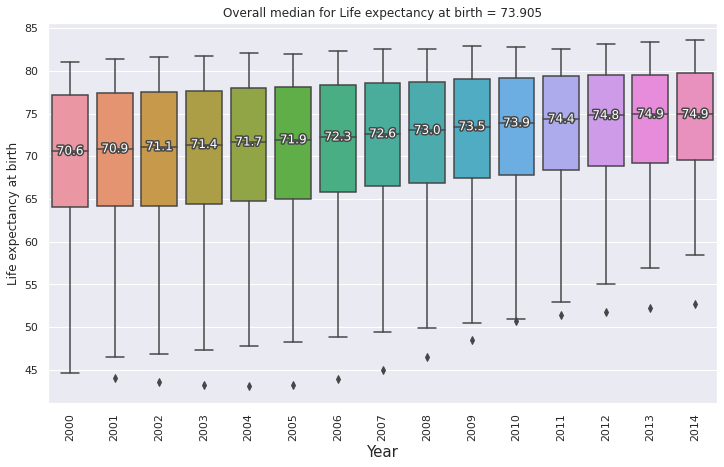

<IPython.core.display.Javascript object>

In [ ]:
for param in loop_params:
  plt.figure(figsize = (12,7))
  box_plot = sns.boxplot(x = 'Year', y = param, data = df)
  plt.xticks(rotation = 90)
  plt.xlabel(xlabel = 'Year', fontsize = 15)
  plt.title('Overall median for '+ param + ' = '+ str(df[param].median()))
  add_median_labels(box_plot.axes)
  plt.show()

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})''')) 

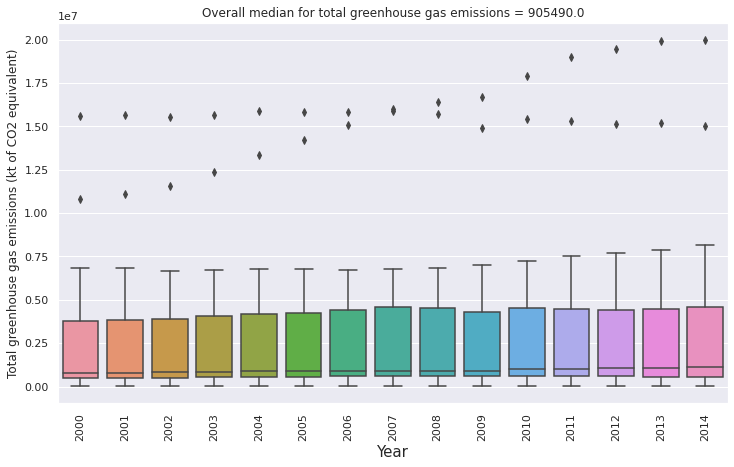

In [ ]:
plt.figure(figsize = (12,7))
box_plot = sns.boxplot(x = 'Year', y = 'Total greenhouse gas emissions (kt of CO2 equivalent)', data = df)
plt.xticks(rotation = 90)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.title('Overall median for total greenhouse gas emissions = ' + str(df['Total greenhouse gas emissions (kt of CO2 equivalent)'].median()))
#add_median_labels(box_plot.axes)
plt.show()

- Insights:  
  - Rural population median has been decreasing over the years.
  - Greenhouse gas emissions and life expectancy medians have been increasing over the years.


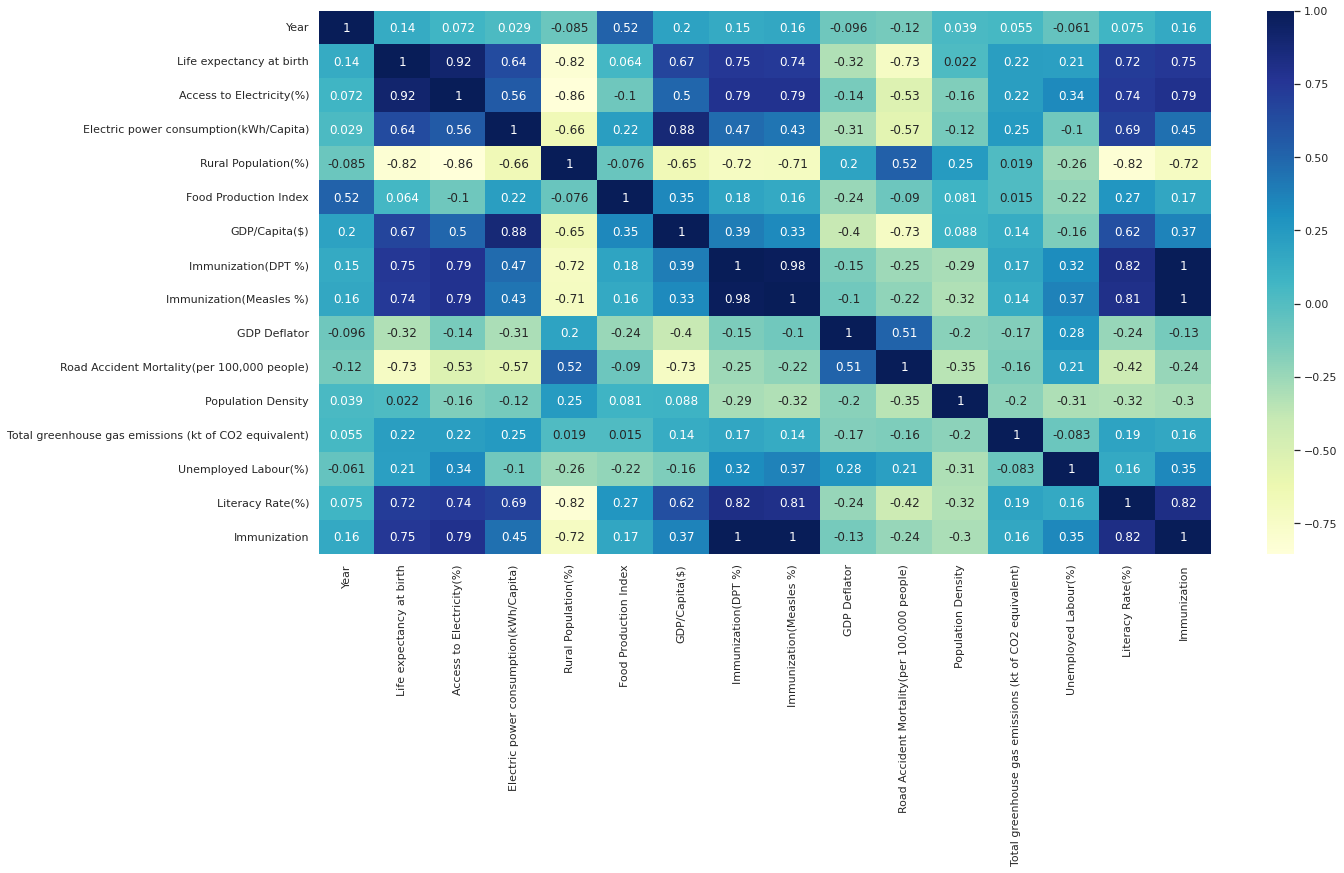

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
countries = list(df['Country'].unique())
countries.remove('High')
countries.remove('Low')
countries.remove('Middle')

scatter_params = list(df.columns)
scatter_params.remove('Immunization')
scatter_params.remove('Year')
scatter_params.remove('Country')
scatter_params.remove('Life expectancy at birth')
print(scatter_params)

['Access to Electricity(%)', 'Electric power consumption(kWh/Capita)', 'Rural Population(%)', 'Food Production Index', 'GDP/Capita($)', 'Immunization(DPT %)', 'Immunization(Measles %)', 'GDP Deflator', 'Road Accident Mortality(per 100,000 people)', 'Population Density', 'Total greenhouse gas emissions (kt of CO2 equivalent)', 'Unemployed Labour(%)', 'Literacy Rate(%)']


<IPython.core.display.Javascript object>

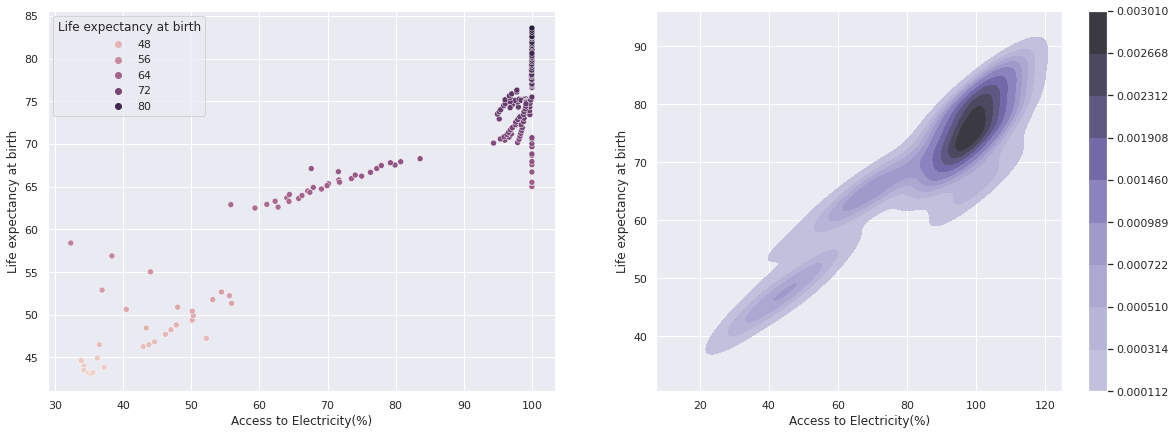

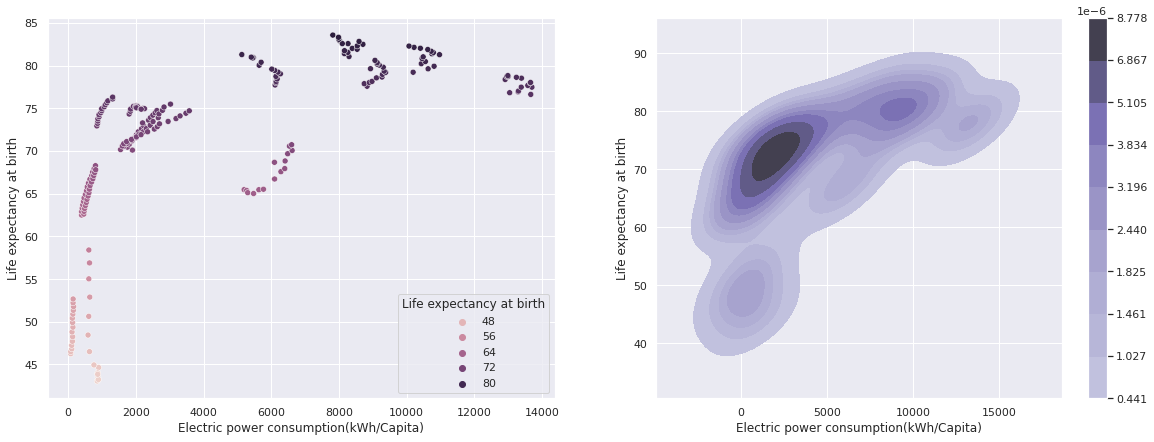

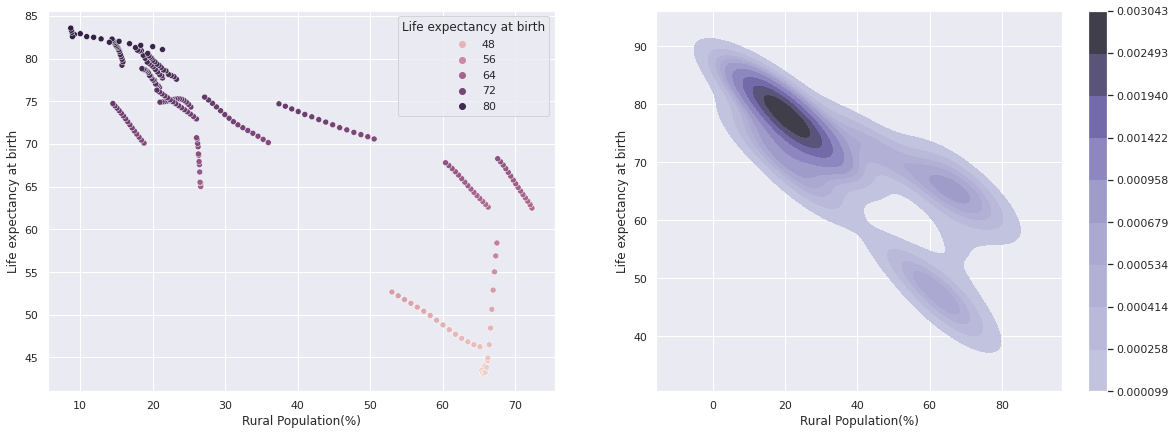

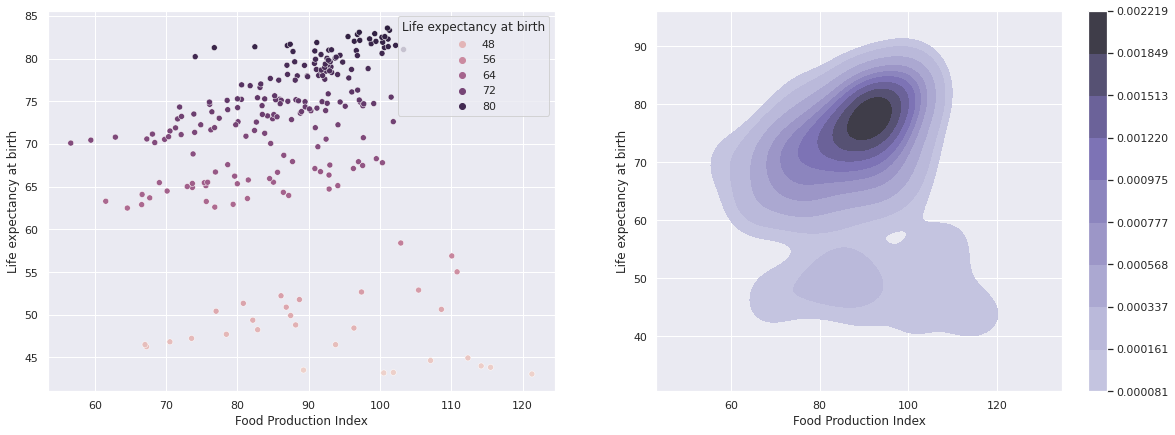

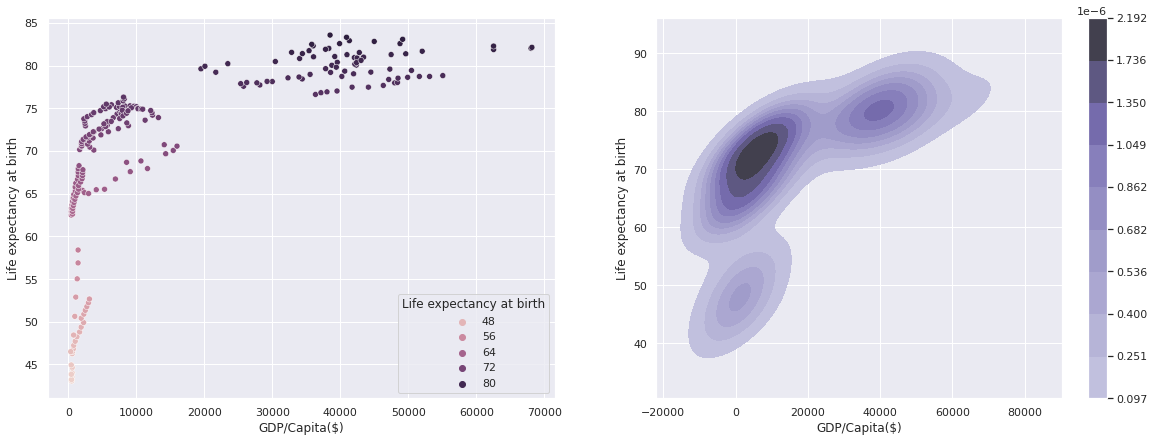

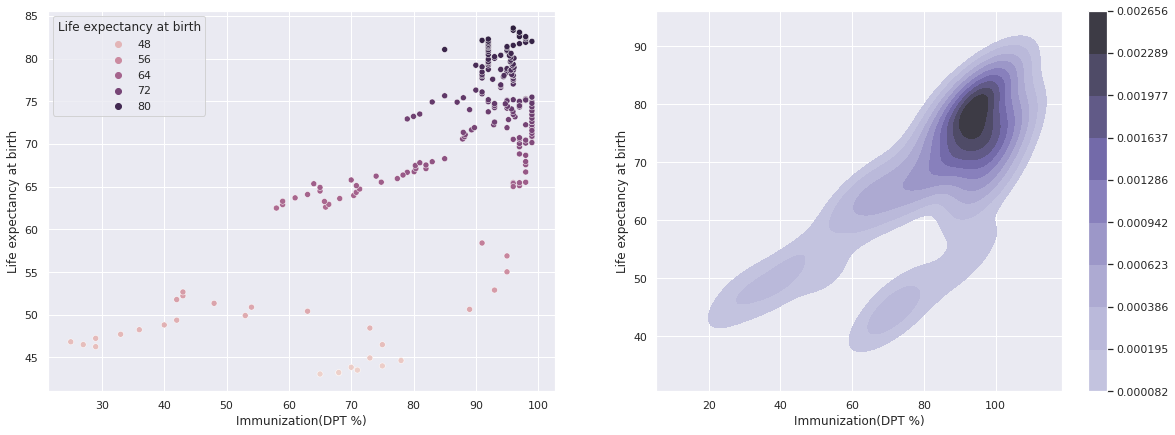

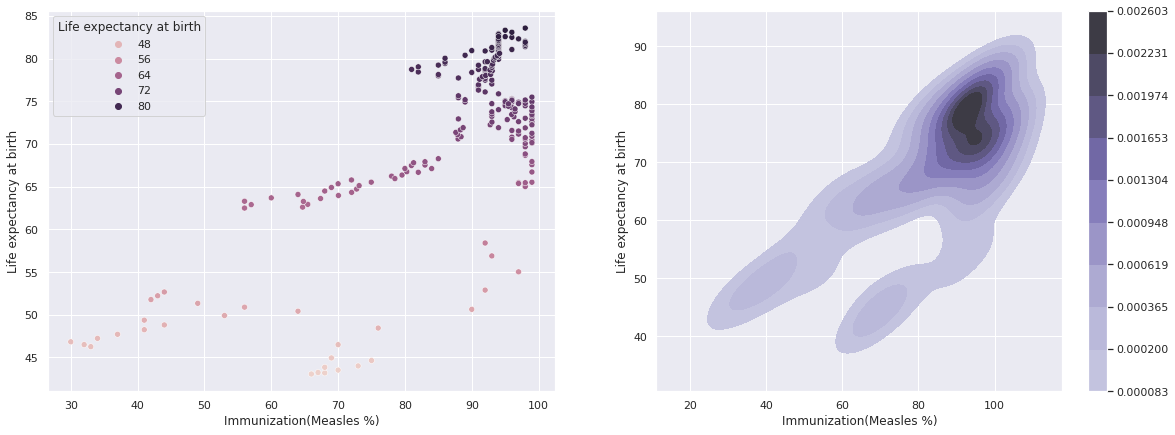

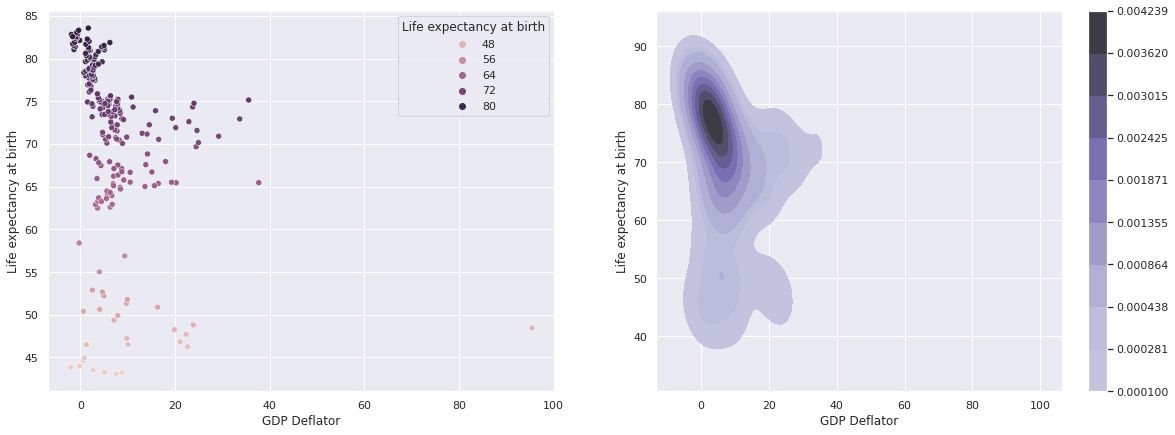

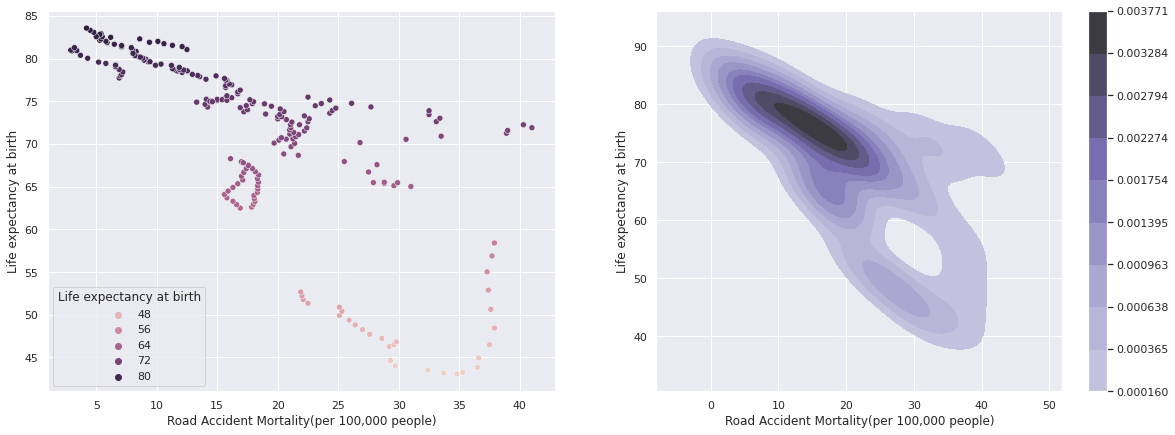

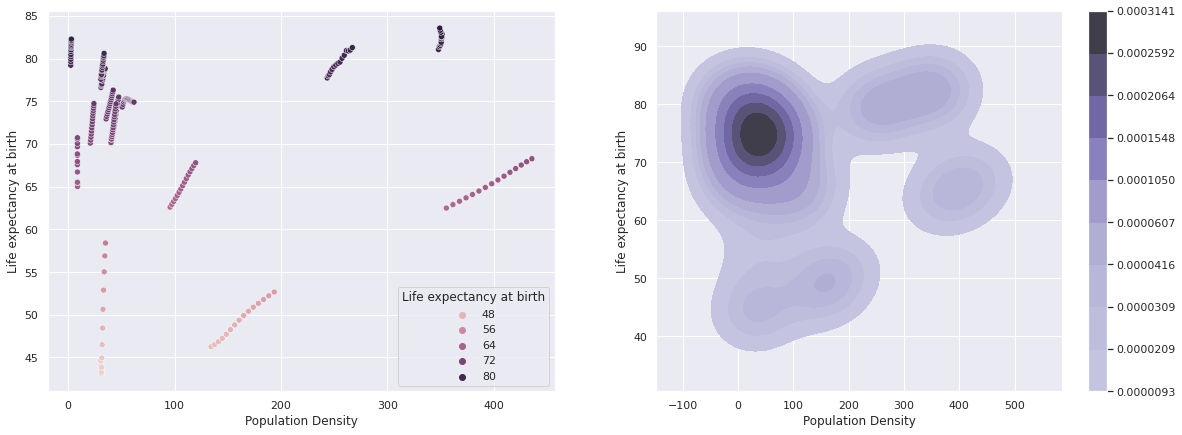

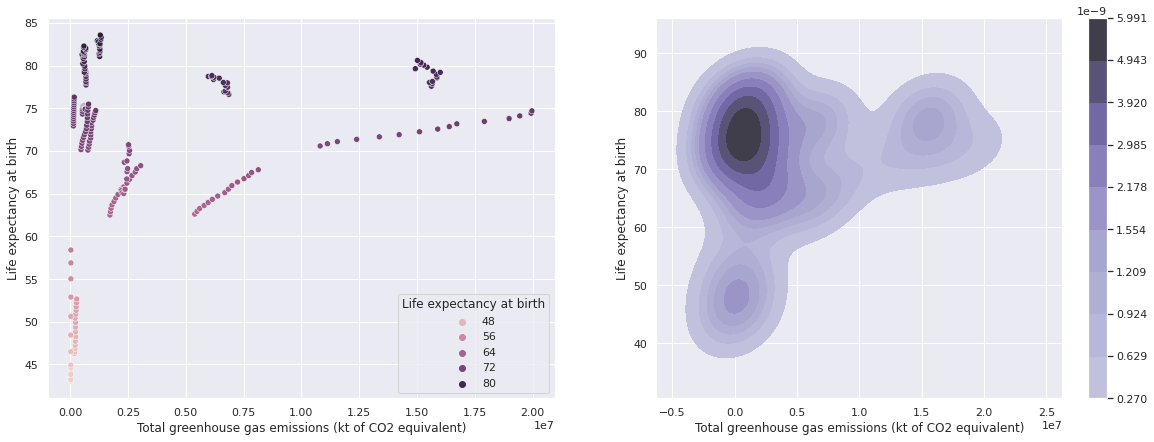

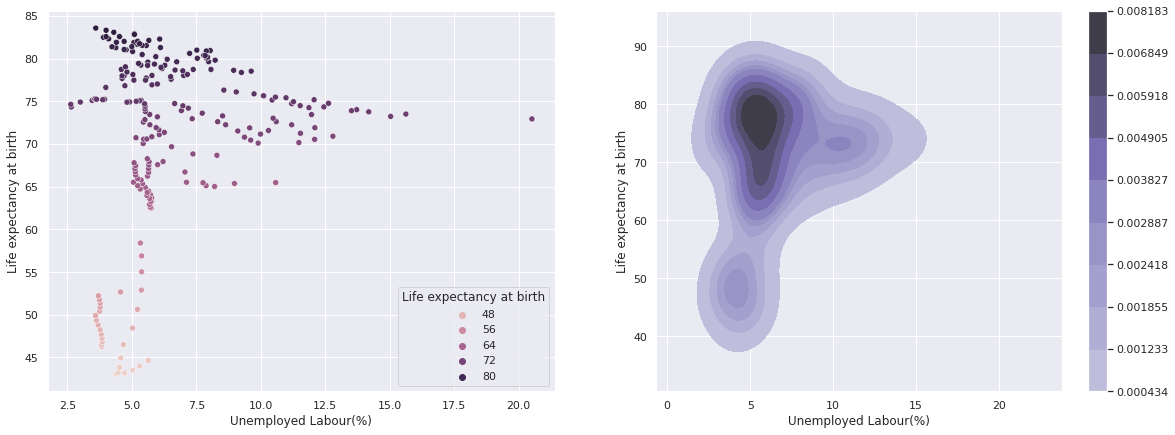

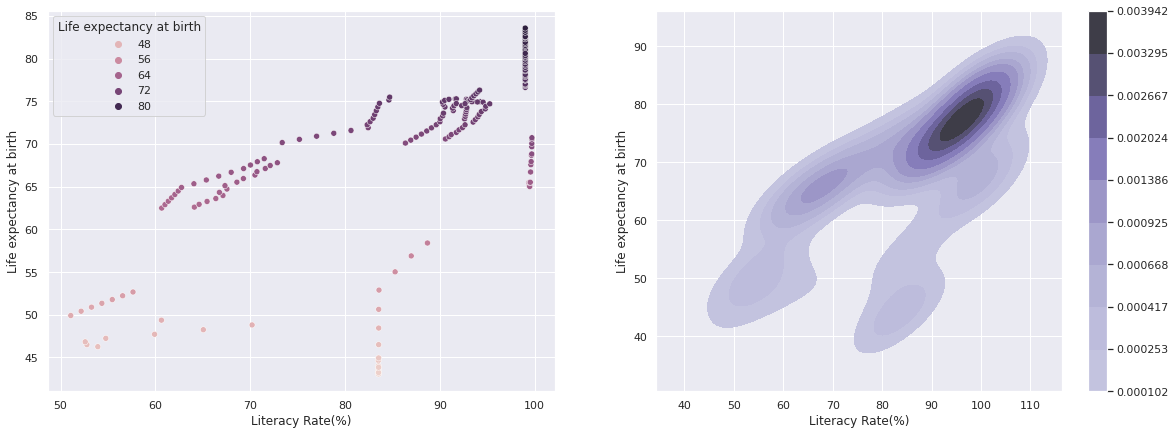

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

import matplotlib.pyplot as plt
import numpy as np
import pandas
for param in scatter_params :
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  sns.scatterplot(x=param, y='Life expectancy at birth', data=df ,hue='Life expectancy at birth')
  plt.subplot(1,2,2)
  res=sns.kdeplot(df[param],df['Life expectancy at birth'],shade=True,cmap="Purples_d",cbar=True)
  plt.show();

India


In [ ]:
df_india = df.loc[df['Country'] == 'India'].copy()
df_india.drop(columns=['Country'], inplace=True)
df_india['Immunization'] = df[['Immunization(DPT %)','Immunization(Measles %)']].mean(axis=1)
df_india.reset_index(drop = True, inplace = True)
df_india

,Year,Life expectancy at birth,Access to Electricity(%),Electric power consumption(kWh/Capita),Rural Population(%),Food Production Index,GDP/Capita($),Immunization(DPT %),Immunization(Measles %),GDP Deflator,"Road Accident Mortality(per 100,000 people)",Population Density,Total greenhouse gas emissions (kt of CO2 equivalent),Unemployed Labour(%),Literacy Rate(%),Immunization
0,2000,62.505,59.34105,393.6462,72.333,64.56,443.3142,58.0,56.0,3.644970,16.9,355.3677,1717560,5.75,60.666578,57.0
1,2001,62.907,55.80000,393.8102,72.082,66.57,451.5730,59.0,57.0,3.215616,16.6,361.5645,1741320,5.73,61.014560,58.0
2,2002,63.304,62.30000,410.6448,71.756,61.53,470.9868,59.0,56.0,3.715684,16.3,367.7253,1763940,5.77,61.362542,57.5
3,2003,63.699,64.02313,430.4832,71.428,67.70,546.7266,61.0,60.0,3.867798,15.8,373.8487,1808910,5.77,61.710524,60.5
4,2004,64.095,64.40000,451.6115,71.097,66.63,627.7742,63.0,64.0,5.725413,15.6,379.9365,1894780,5.72,62.058506,63.5
5,2005,64.500,67.09344,468.0258,70.765,70.14,714.8610,65.0,68.0,5.621903,15.9,385.9861,1969680,5.65,62.406488,66.5
6,2006,64.918,67.90000,509.2141,70.431,73.68,806.7533,65.0,69.0,8.400938,16.3,391.9986,2065570,5.52,62.754470,67.0
7,2007,65.350,70.13076,541.7384,70.094,79.99,1028.3350,64.0,70.0,6.944418,16.7,397.9596,2209240,5.41,64.064088,67.0
8,2008,65.794,71.65108,561.2476,69.754,81.53,998.5223,70.0,72.0,9.193970,17.1,403.8322,2309340,5.36,65.373706,71.0
9,2009,66.244,75.00000,598.4982,69.413,79.61,1101.9610,74.0,78.0,7.040365,17.0,409.5689,2452660,5.61,66.683324,76.0


<IPython.core.display.Javascript object>

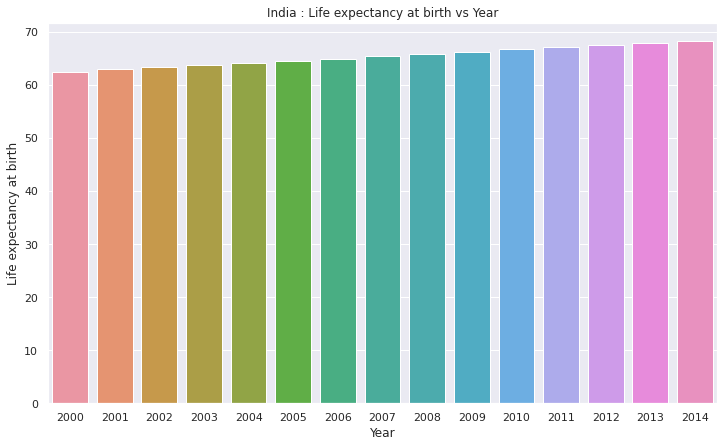

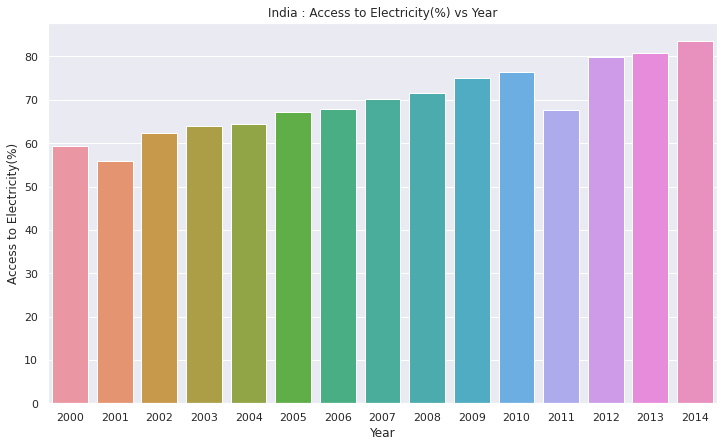

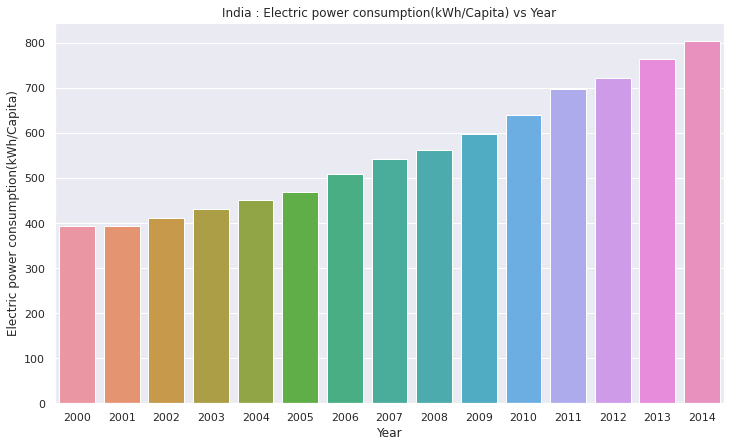

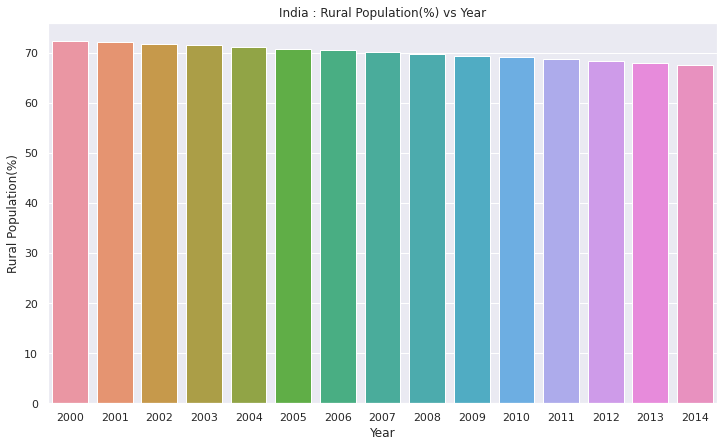

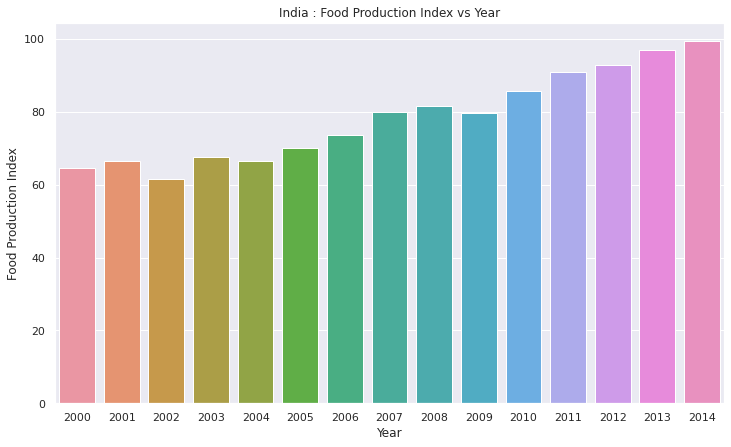

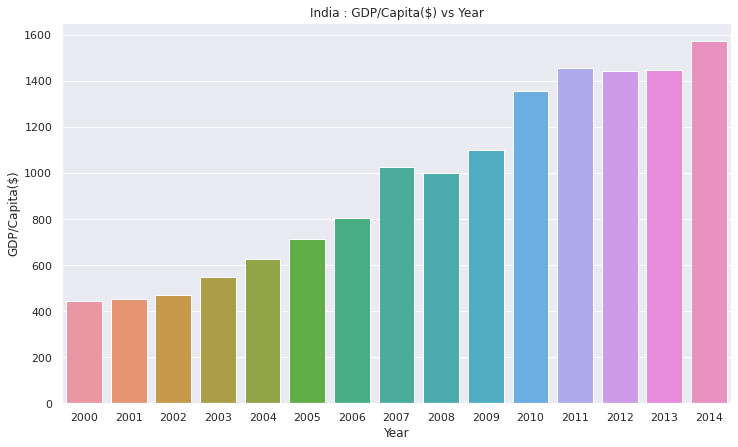

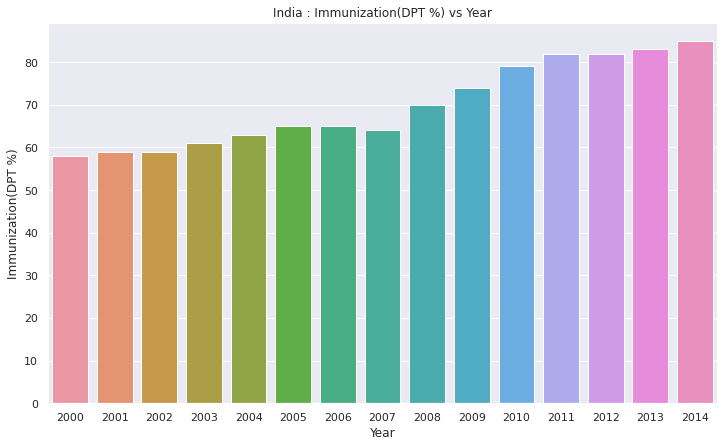

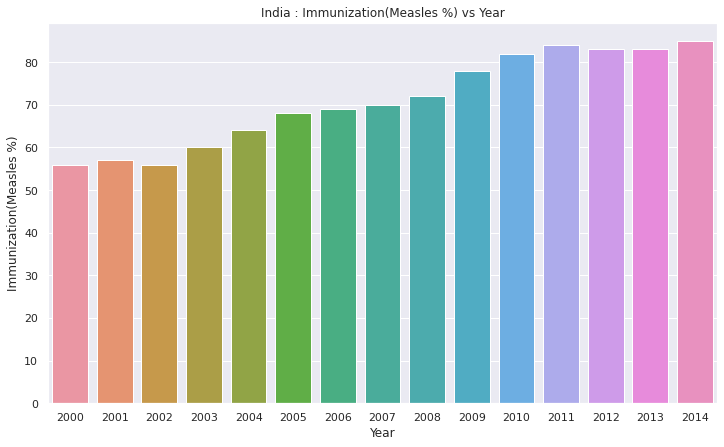

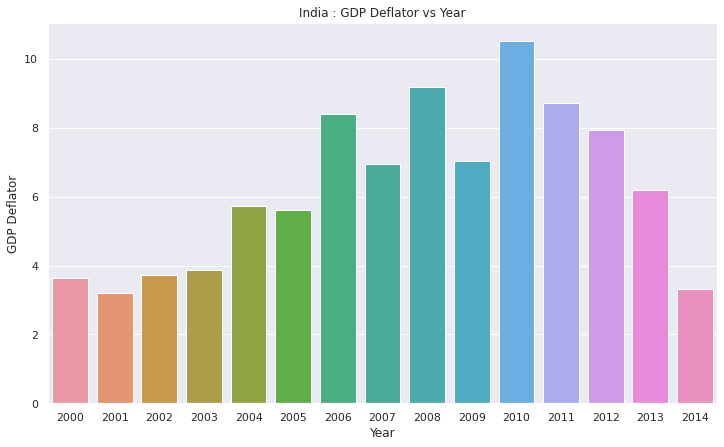

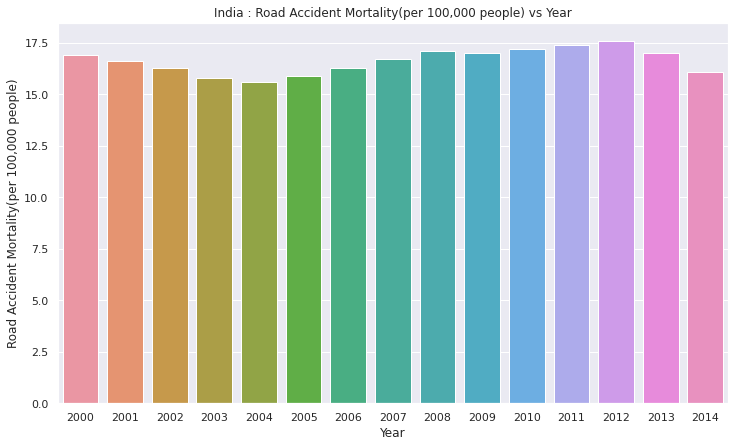

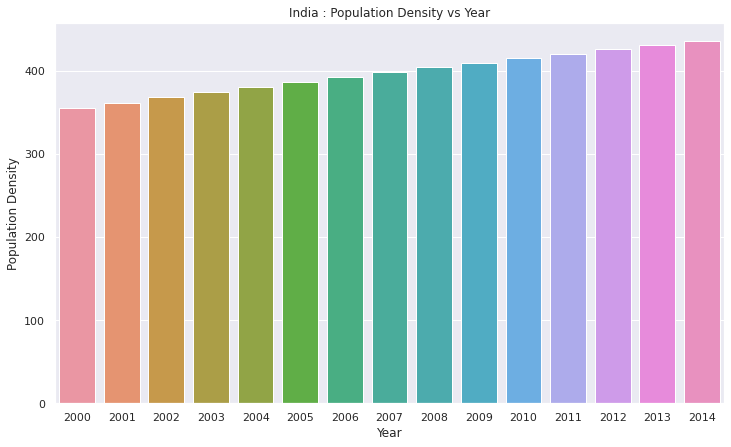

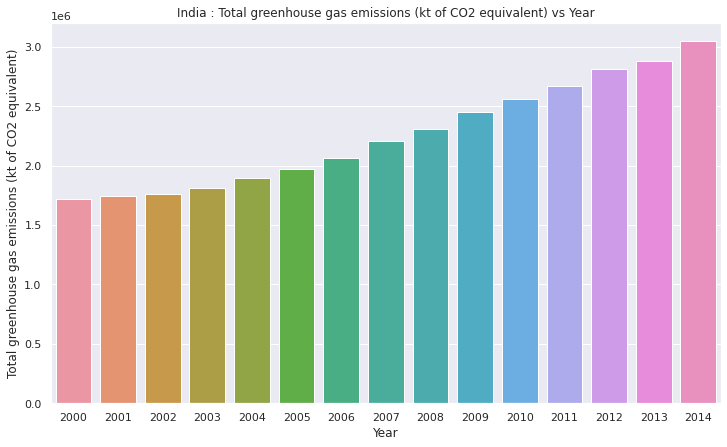

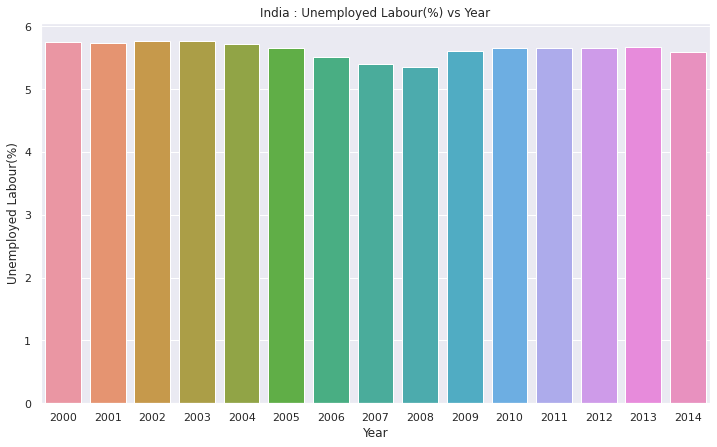

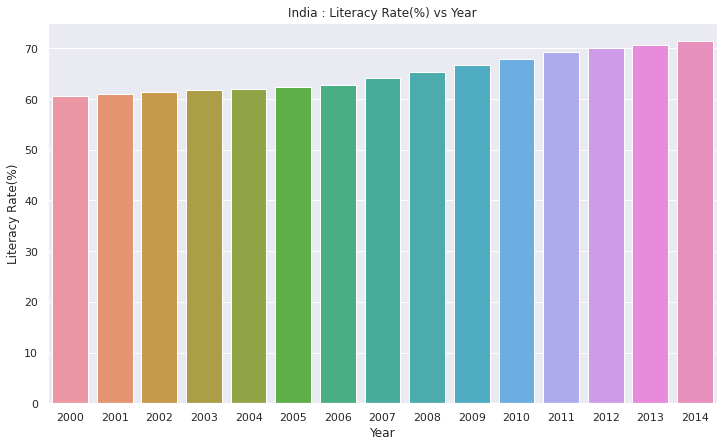

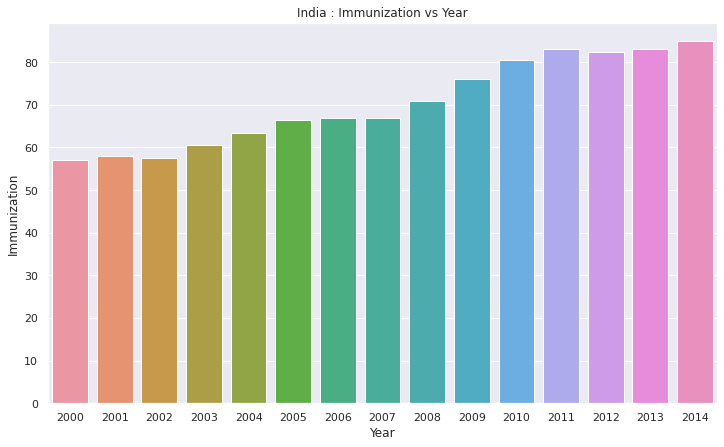

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

parameters = list(df_india.columns)
parameters.remove('Year')

sns.set(rc={'figure.figsize':(12,7)})
for i,param in enumerate(parameters):
  plt.figure(i)
  sns.barplot(data = df_india, x = 'Year', y = param).set_title('India : '+param+' vs Year')

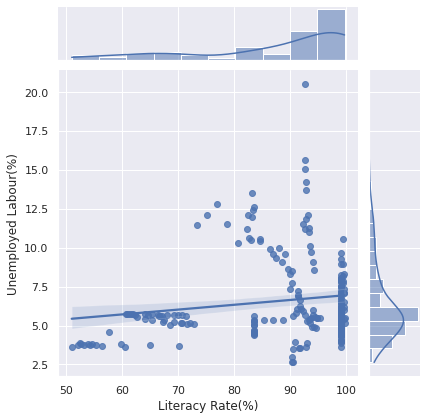

In [ ]:
sns.jointplot(x='Literacy Rate(%)', y='Unemployed Labour(%)', data=df,kind='reg')
plt.show()

In [ ]:
trivarplts=['Life expectancy at birth','Population Density']

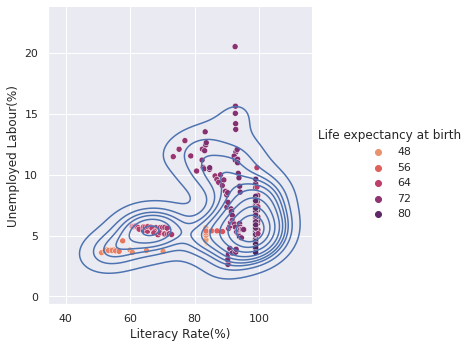

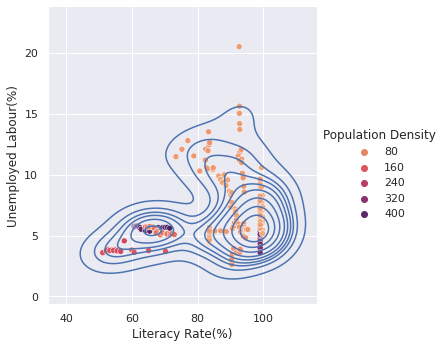

In [ ]:
for var in trivarplts:

  sns.relplot(x='Literacy Rate(%)', y='Unemployed Labour(%)', hue = var,palette="flare", data=df)
  sns.kdeplot(df['Literacy Rate(%)'], df['Unemployed Labour(%)'])
  plt.show();

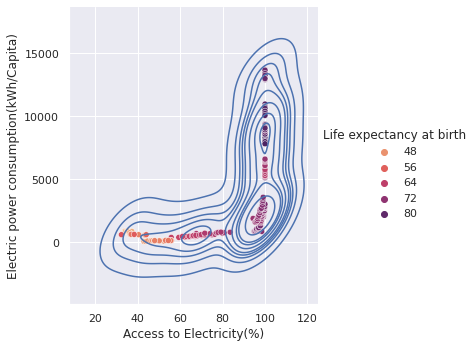

In [ ]:
sns.relplot(x='Access to Electricity(%)', y='Electric power consumption(kWh/Capita)', hue='Life expectancy at birth',palette="flare", data=df)
sns.kdeplot(df['Access to Electricity(%)'], df['Electric power consumption(kWh/Capita)'])
plt.show()

## Scatter plots

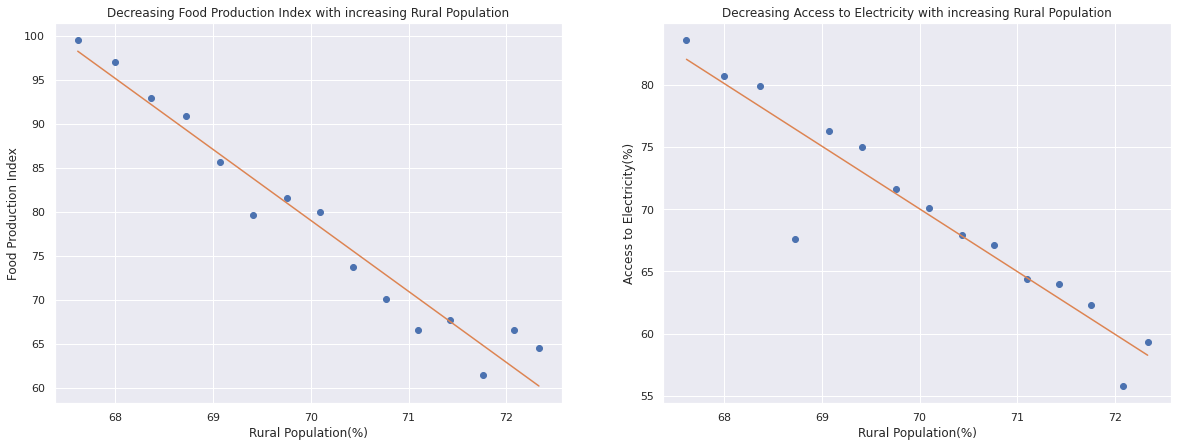

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title('Decreasing Food Production Index with increasing Rural Population')
# FPI Vs Rural population
plt.plot(df_india['Rural Population(%)'], df_india['Food Production Index'], 'o')
#create scatter plot

m1, c1 = np.polyfit(df_india['Rural Population(%)'], df_india['Food Production Index'], 1)
#m1 = slope, c1=intercept (linear regression)

plt.plot(df_india['Rural Population(%)'], m1*df_india['Rural Population(%)'] + c1)
plt.xlabel('Rural Population(%)')
plt.ylabel('Food Production Index')

#Access to electricity vs Rural population
plt.subplot(1,2,2)
plt.title('Decreasing Access to Electricity with increasing Rural Population')
plt.plot(df_india['Rural Population(%)'], df_india['Access to Electricity(%)'], 'o')
#create scatter plot

m2, c2 = np.polyfit(df_india['Rural Population(%)'], df_india['Access to Electricity(%)'], 1)
#m2 = slope, c2=intercept (linear regression)

plt.plot(df_india['Rural Population(%)'], m2*df_india['Rural Population(%)'] + c2)
plt.xlabel('Rural Population(%)')
plt.ylabel('Access to Electricity(%)')
plt.show()

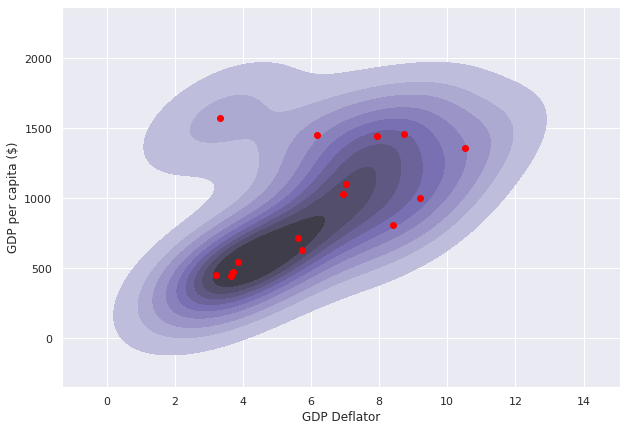

In [ ]:
# GDP per capita vs GDP deflator
plt.figure(figsize=(10,7))
plt.plot(df_india['GDP Deflator'], df_india['GDP/Capita($)'], 'o', color = 'red')
#create scatter plot
sns.kdeplot(df_india['GDP Deflator'], df_india['GDP/Capita($)'], fill=True, cmap = 'Purples_d', shade = True)
plt.xlabel('GDP Deflator')
plt.ylabel('GDP per capita ($)')
plt.show()

### Pie charts

In [ ]:
high_gh   = df.loc[df['Country']=='High']['Total greenhouse gas emissions (kt of CO2 equivalent)'].mean()
middle_gh = df.loc[df['Country']=='Middle']['Total greenhouse gas emissions (kt of CO2 equivalent)'].mean()
low_gh    = df.loc[df['Country']=='Low']['Total greenhouse gas emissions (kt of CO2 equivalent)'].mean()

high_pc   = df.loc[df['Country']=='High']['Electric power consumption(kWh/Capita)'].mean()
middle_pc   = df.loc[df['Country']=='Middle']['Electric power consumption(kWh/Capita)'].mean()
low_pc   = df.loc[df['Country']=='Low']['Electric power consumption(kWh/Capita)'].mean()

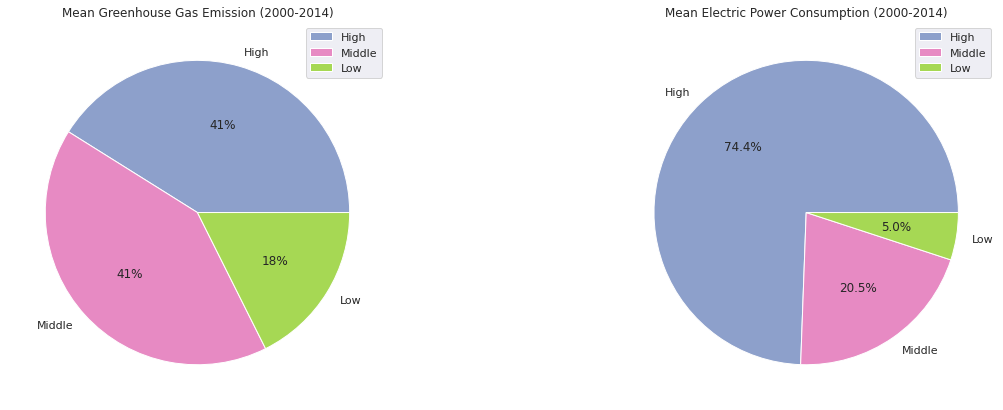

In [ ]:
categories = ['High', 'Middle', 'Low']
data_gh    = [high_gh, middle_gh, low_gh]
data_pc    = [high_pc, middle_pc, low_pc]
colors = sns.color_palette('Set2')[2:5]

plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.pie(data_gh, labels = categories, colors = colors, autopct='%.0f%%')
plt.title('Mean Greenhouse Gas Emission (2000-2014)')
plt.legend(loc = 'upper right')
plt.subplot(1,2,2)
plt.pie(data_pc, labels = categories, colors = colors, autopct='%.1f%%')
plt.legend()
plt.title('Mean Electric Power Consumption (2000-2014)')
plt.show()

Modelling

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [ ]:
 df_train = pd.read_csv('/content/Data_training.csv')
 df_train.head()

,Country,Year,Access to Electricity(%),Food Production Index,Population Density,Unemployed Labour(%),"Road Accident Mortality(per 100,000 people)",Electric power consumption(kWh/Capita),GDP Deflator,GDP/Capita($),Literacy Rate Adult,Immunization(Measles %),Immunization(DPT %),Life Expectancy at Birth,Total greenhouse gas emissions (kt of CO2 equivalent),Rural Population(%)
0,Albania,2000,100.0,64.01,112.738212,16.58,14.3,1449.647413,5.643782,1126.683318,98.712982,95.0,97.0,73.955,8220,58.259
1,Albania,2001,100.0,65.89,111.685146,16.54,14.5,1351.230796,3.813933,1281.659393,98.712982,95.0,97.0,74.288,8190,57.565
2,Albania,2002,100.0,66.38,111.350730,16.61,14.5,1578.165919,3.644150,1425.124849,98.712982,96.0,98.0,74.579,8820,56.499
3,Albania,2003,100.0,69.58,110.934891,16.61,14.7,1469.264539,5.197105,1846.118813,98.712982,93.0,97.0,74.828,9250,55.427
4,Albania,2004,100.0,72.89,110.472226,16.52,14.7,1797.525487,3.156944,2373.579844,98.712982,96.0,97.0,75.039,9310,54.349


In [ ]:
df_train['Immunization'] = df_train[['Immunization(Measles %)', 'Immunization(DPT %)']].mean(axis=1)
df_train.head()

,Country,Year,Access to Electricity(%),Food Production Index,Population Density,Unemployed Labour(%),"Road Accident Mortality(per 100,000 people)",Electric power consumption(kWh/Capita),GDP Deflator,GDP/Capita($),Literacy Rate Adult,Immunization(Measles %),Immunization(DPT %),Life Expectancy at Birth,Total greenhouse gas emissions (kt of CO2 equivalent),Rural Population(%),Immunization
0,Albania,2000,100.0,64.01,112.738212,16.58,14.3,1449.647413,5.643782,1126.683318,98.712982,95.0,97.0,73.955,8220,58.259,96.0
1,Albania,2001,100.0,65.89,111.685146,16.54,14.5,1351.230796,3.813933,1281.659393,98.712982,95.0,97.0,74.288,8190,57.565,96.0
2,Albania,2002,100.0,66.38,111.350730,16.61,14.5,1578.165919,3.644150,1425.124849,98.712982,96.0,98.0,74.579,8820,56.499,97.0
3,Albania,2003,100.0,69.58,110.934891,16.61,14.7,1469.264539,5.197105,1846.118813,98.712982,93.0,97.0,74.828,9250,55.427,95.0
4,Albania,2004,100.0,72.89,110.472226,16.52,14.7,1797.525487,3.156944,2373.579844,98.712982,96.0,97.0,75.039,9310,54.349,96.5


###Linear Regression

In [ ]:
error_table = pd.DataFrame()

90:10

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

model = LinearRegression()
model.fit(x_train, y_train)
LinearRegression()
y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)
inter = model.intercept_
print('Coefficient array:',model.coef_)

Error = pd.Series({'Fraction': "90:10",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2,'Intercept':inter})
error_table = error_table.append(Error, ignore_index=True)
error_table

Coefficient array: [ 0.18662236  4.90963572 -0.0089016   0.06666171 -0.47886285 -1.60147732
 -1.08948005  0.06983766  1.67366573 -1.02672176  0.28387706 -0.61229033
  2.11101613]


,Fraction,Intercept,MAE,MSE,R2 Score,RMSE
0,90:10,68.551351,2.246135,9.376017,0.836655,3.062028


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,73.153400
285,76.366000,72.797789
919,53.475000,53.790576
120,55.391000,56.203757
585,67.557795,71.382511


80:20

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

model = LinearRegression()
model.fit(x_train, y_train)
LinearRegression()
y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)
inter = model.intercept_
print('Coefficient array:',model.coef_)

Error = pd.Series({'Fraction': "80:20",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2,'Intercept':inter})
error_table = error_table.append(Error, ignore_index=True)
error_table

Coefficient array: [ 0.16522917  4.85521762  0.05358755  0.04291514 -0.45970863 -1.59112574
 -1.11857846  0.07000647  1.70261966 -1.01253029  0.31544103 -0.64540828
  2.08354396]


,Fraction,Intercept,MAE,MSE,R2 Score,RMSE
0,90:10,68.551351,2.246135,9.376017,0.836655,3.062028
1,80:20,68.626982,2.283324,10.048181,0.840939,3.169887


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,73.192548
285,76.366000,72.915145
919,53.475000,53.890524
120,55.391000,56.325412
585,67.557795,71.329932


70:30

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

model = LinearRegression()
model.fit(x_train, y_train)
LinearRegression()
y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)
inter = model.intercept_
print('Coefficient array:',model.coef_)

Error = pd.Series({'Fraction': "70:30",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2,'Intercept':inter})
error_table = error_table.append(Error, ignore_index=True)
error_table

Coefficient array: [ 0.06528092  5.06263763  0.09093502  0.01551206 -0.51806216 -1.5111888
 -1.10469162 -0.48499992  1.62833185 -1.04583803  0.27823032 -0.59640302
  2.09172721]


,Fraction,Intercept,MAE,MSE,R2 Score,RMSE
0,90:10,68.551351,2.246135,9.376017,0.836655,3.062028
1,80:20,68.626982,2.283324,10.048181,0.840939,3.169887
2,70:30,68.631378,2.472308,40.846597,0.333171,6.391134


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,73.740602
285,76.366000,73.282725
919,53.475000,53.769409
120,55.391000,56.499418
585,67.557795,70.703169


60:40

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

model = LinearRegression()
model.fit(x_train, y_train)
LinearRegression()
y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)
inter = model.intercept_
print('Coefficient array:',model.coef_)

Error = pd.Series({'Fraction': "60:40",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2,'Intercept':inter})
error_table = error_table.append(Error, ignore_index=True)
error_table

Coefficient array: [ 0.08574545  5.07670282  0.021653    0.06893907 -0.53266412 -1.49954248
 -1.08773543 -0.47555007  1.59659373 -1.00566461  0.25782602 -0.56204615
  2.13630037]


,Fraction,Intercept,MAE,MSE,R2 Score,RMSE
0,90:10,68.551351,2.246135,9.376017,0.836655,3.062028
1,80:20,68.626982,2.283324,10.048181,0.840939,3.169887
2,70:30,68.631378,2.472308,40.846597,0.333171,6.391134
3,60:40,68.525274,2.382400,29.873105,0.510407,5.465629


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,73.709823
285,76.366000,73.160763
919,53.475000,53.790947
120,55.391000,56.395039
585,67.557795,70.803350


###Decision Tree

In [ ]:
error_table2 = pd.DataFrame()

90:10

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

reg = DecisionTreeRegressor()
reg = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)

Error = pd.Series({'Fraction': "90:10",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2})
error_table2 = error_table2.append(Error, ignore_index=True)
error_table2

,Fraction,MAE,MSE,R2 Score,RMSE
0,90:10,0.676857,1.700115,0.970381,1.303884


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,73.835000
285,76.366000,75.152000
919,53.475000,54.732000
120,55.391000,54.968000
585,67.557795,67.699156


80:20

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

reg = DecisionTreeRegressor()
reg = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)

Error = pd.Series({'Fraction': "80:20",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2})
error_table2 = error_table2.append(Error, ignore_index=True)
error_table2

,Fraction,MAE,MSE,R2 Score,RMSE
0,90:10,0.676857,1.700115,0.970381,1.303884
1,80:20,0.802965,3.045144,0.951796,1.745034


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,73.835000
285,76.366000,76.634000
919,53.475000,54.732000
120,55.391000,50.041000
585,67.557795,67.699156


70:30

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

reg = DecisionTreeRegressor()
reg = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)

Error = pd.Series({'Fraction': "70:30",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2})
error_table2 = error_table2.append(Error, ignore_index=True)
error_table2

,Fraction,MAE,MSE,R2 Score,RMSE
0,90:10,0.676857,1.700115,0.970381,1.303884
1,80:20,0.802965,3.045144,0.951796,1.745034
2,70:30,0.936379,3.531068,0.942355,1.879114


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,74.409000
285,76.366000,75.882000
919,53.475000,56.887000
120,55.391000,48.946000
585,67.557795,68.157172


60:40

In [ ]:
x = df_train.drop(['Country','Life Expectancy at Birth','Immunization(DPT %)','Immunization(Measles %)'], axis=1)
y = df_train['Life Expectancy at Birth']

xi_train, xi_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

xi_train.reset_index(drop=True, inplace=True)
xi_test.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(xi_train)
x_test = scaler.transform(xi_test)

reg = DecisionTreeRegressor()
reg = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(abs(y_test-y_pred))
r2 = r2_score(y_test,y_pred)

Error = pd.Series({'Fraction': "60:40",'MSE': mse,'RMSE':rmse,'MAE':mae,'R2 Score':r2})
error_table2 = error_table2.append(Error, ignore_index=True)
error_table2

,Fraction,MAE,MSE,R2 Score,RMSE
0,90:10,0.676857,1.700115,0.970381,1.303884
1,80:20,0.802965,3.045144,0.951796,1.745034
2,70:30,0.936379,3.531068,0.942355,1.879114
3,60:40,0.967642,3.703468,0.939303,1.924440


In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
309,74.119000,74.409000
285,76.366000,76.322000
919,53.475000,56.436000
120,55.391000,50.921000
585,67.557795,67.699156


##Support Vector Machines for Regression##

In [ ]:
#Reading the data and doing one hot encoding for categorical variables 'Year' and dropping the unnecessary column 'Country'
#Reordering the columns to get expected variable as first columns
df = pd.read_csv("/content/Data_training.csv")

df['Immunization'] = (df['Immunization(DPT %)']+df['Immunization(Measles %)'])/2
df.drop(columns=['Immunization(DPT %)','Immunization(Measles %)'], inplace = True)

cols = df.columns.tolist()
cols = cols[11:12]+cols[:11]+cols[12:]
df = df[cols]
df = df.sample(frac=1, random_state = 23).reset_index(drop=True)

cols = df.columns.tolist()
cols = cols[2:]
y = df['Life Expectancy at Birth']
y = pd.DataFrame(y)
X = df[cols]

###Initialization for grid search over the hyperparameters for model###

In [ ]:
param_grid = [
              {'kernel' : ['linear'], 'C':[0.001, 0.1, 10, 100] },
              {'kernel' : ['rbf','sigmoid'], 'gamma' : [0.001,0.01,0.1, 10, 100,500,1000], 'C' : [0.001, 0.1, 10, 100] },
              {'kernel' : ['poly'], 'degree' : [2,3,4], 'C' : [0.001, 0.1, 10, 100] }
]

K = 5 #5 Fold cross validation

metric_grid = {'MSE' : make_scorer(mean_squared_error, greater_is_better = False), 'R2' : make_scorer(r2_score), 'MAE' : make_scorer(mean_absolute_error, greater_is_better = False)}

svm_reg = SVR()

##60:40 Split into Training and Test##

In [ ]:
#Split Ratio 60, 40

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4)

train_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

#Applying Standard Scaling of test data to both test and train
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

grid_search = GridSearchCV(svm_reg, param_grid, scoring = metric_grid, refit = 'R2', cv = K)
grid_search.fit(train_X_scaled, train_y.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("At split of 60 : 40 these are the  hyperparameters :\n", grid_search.best_params_, '\n')

At split of 60 : 40 these are the  hyperparameters :
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 



##Using the predicted best Hyperparameters from 60:40 split##

In [ ]:
svm_reg = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
svm_reg.fit(train_X_scaled, train_y.values.ravel())
test_pred_y = svm_reg.predict(test_X_scaled)

print("Using the best hyperparameters from 60:40 split : ")
print('Mean Squared Error on Test Data :',mean_squared_error(test_y,test_pred_y))
print('Mean Absolute Error on Test Data :',mean_absolute_error(test_y,test_pred_y))
print('R2 Score on Test Data :',r2_score(test_y,test_pred_y))

Using the best hyperparameters from 60:40 split : 
Mean Squared Error on Test Data : 1.068167467093339
Mean Absolute Error on Test Data : 0.6193844433164097
R2 Score on Test Data : 0.982922326682142


##70:30 Split into Training and Test##

In [ ]:
#Split Ratio 70, 30

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)

train_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

#Applying Standard Scaling of test data to both test and train
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

grid_search = GridSearchCV(svm_reg, param_grid, scoring = metric_grid, refit = 'R2', cv = K)
grid_search.fit(train_X_scaled, train_y.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("At split of 70 : 30 these are the  hyperparameters :\n", grid_search.best_params_, '\n')

At split of 70 : 30 these are the  hyperparameters :
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 



##Using the predicted best Hyperparameters from 70:30 split##

In [ ]:
svm_reg = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
svm_reg.fit(train_X_scaled, train_y.values.ravel())
test_pred_y = svm_reg.predict(test_X_scaled)

print("Using the best hyperparameters from 70:30 split : ")
print('Mean Squared Error on Test Data :',mean_squared_error(test_y,test_pred_y))
print('Mean Absolute Error on Test Data :',mean_absolute_error(test_y,test_pred_y))
print('R2 Score on Test Data :',r2_score(test_y,test_pred_y))

Using the best hyperparameters from 70:30 split : 
Mean Squared Error on Test Data : 0.7362402627975829
Mean Absolute Error on Test Data : 0.5190577765286374
R2 Score on Test Data : 0.9882073037099876


##80:20 Split into Training and Test##

In [ ]:
#Split Ratio 80, 20

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

#Applying Standard Scaling of test data to both test and train
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

grid_search = GridSearchCV(svm_reg, param_grid, scoring = metric_grid, refit = 'R2', cv = K)
grid_search.fit(train_X_scaled, train_y.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("At split of 80 : 20 these are the  hyperparameters :\n", grid_search.best_params_, '\n')

At split of 80 : 20 these are the  hyperparameters :
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 



##Using the predicted best Hyperparameters from 80:20 split##

In [ ]:
svm_reg = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
svm_reg.fit(train_X_scaled, train_y.values.ravel())
test_pred_y = svm_reg.predict(test_X_scaled)

print("Using the best hyperparameters from 80:20 split : ")
print('Mean Squared Error on Test Data :',mean_squared_error(test_y,test_pred_y))
print('Mean Absolute Error on Test Data :',mean_absolute_error(test_y,test_pred_y))
print('R2 Score on Test Data :',r2_score(test_y,test_pred_y))

Using the best hyperparameters from 80:20 split : 
Mean Squared Error on Test Data : 1.1864242620071876
Mean Absolute Error on Test Data : 0.5895846707395741
R2 Score on Test Data : 0.9799819090336667


Graph for Actual vs Predicted Variables with 45 degree reference line

Text(0, 0.5, 'Predicted Value')

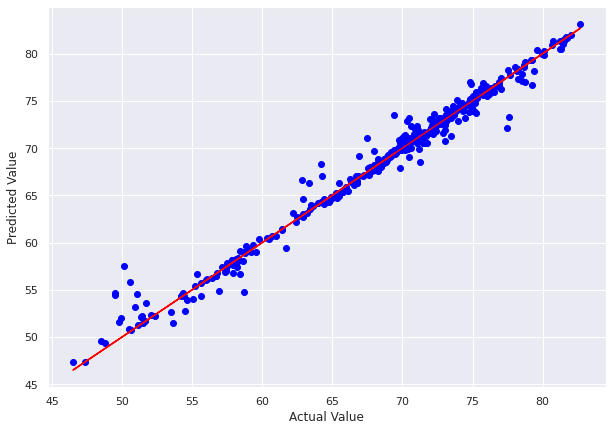

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(x = test_y.values.ravel(), y = test_pred_y,color = 'blue')
plt.plot(test_y.values.ravel(), test_y.values.ravel(), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Text(0, 0.5, 'Offset of Prediction Value')

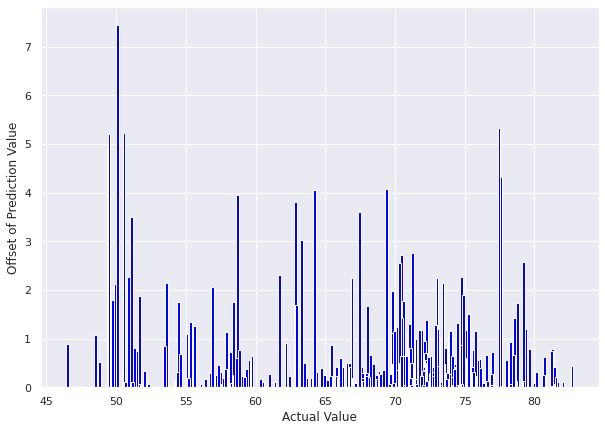

In [ ]:
diff = abs(test_y.values.ravel()-test_pred_y)

plt.figure(figsize = (10, 7))
plt.bar(test_y.values.ravel(), diff, color ='blue', width = 0.2)
plt.xlabel('Actual Value')
plt.ylabel('Offset of Prediction Value')

##90:10 Split into Training and Test##

In [ ]:
#Split Ratio 90, 10

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.1)

train_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

#Applying Standard Scaling of test data to both test and train
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

grid_search = GridSearchCV(svm_reg, param_grid, scoring = metric_grid, refit = 'R2', cv = K)
grid_search.fit(train_X_scaled, train_y.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("At split of 90 : 10 these are the  hyperparameters :\n", grid_search.best_params_, '\n')

At split of 90 : 10 these are the  hyperparameters :
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 



##Using the predicted best Hyperparameters from 80:20 split##

In [ ]:
svm_reg = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
svm_reg.fit(train_X_scaled, train_y.values.ravel())
test_pred_y = svm_reg.predict(test_X_scaled)

print("Using the best hyperparameters from 90:10 split : ")
print('Mean Squared Error on Test Data :',mean_squared_error(test_y,test_pred_y))
print('Mean Absolute Error on Test Data :',mean_absolute_error(test_y,test_pred_y))
print('R2 Score on Test Data :',r2_score(test_y,test_pred_y))

Using the best hyperparameters from 90:10 split : 
Mean Squared Error on Test Data : 4.019269354282607
Mean Absolute Error on Test Data : 0.7792402449800864
R2 Score on Test Data : 0.939761772236713


# Neural Networks

In [ ]:
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_nn = pd.read_csv('/content/Data_training.csv')

In [ ]:
df_nn = df_nn.drop(['Country'], axis = 1)

In [ ]:
df_nn['Immunization'] = df_nn[['Immunization(Measles %)','Immunization(DPT %)']].mean(axis = 1)

In [ ]:
df_nn = df_nn.drop(columns = ['Immunization(Measles %)','Immunization(DPT %)'])

In [ ]:
# Re arranging columns
cols_at_end = ['Life Expectancy at Birth']
df_nn = df_nn[[c for c in df_nn if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_nn]]

In [ ]:
x_data = df_nn.iloc[:, 0:13]
y_data = df_nn.iloc[:, 13]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

## 70:30 split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_data, y_data, random_state=1)

In [ ]:
y_val = y_val.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [ ]:
scaler = StandardScaler()
xtrain_scale=scaler.fit_transform(X_train)
xval_scale = scaler.fit_transform(X_val)
ytrain_scale = scaler.fit_transform(y_train)
yval_scale=scaler.fit_transform(y_val)

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 3,183
Trainable params: 3,183
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=40, batch_size=20, verbose=1, validation_split=0.3, callbacks = [es])
predictions = model.predict(xval_scale)

Epoch 1/40
53/53 [==============================] - 2s 8ms/step - loss: 0.5390 - mse: 0.5390 - mae: 0.5532 - val_loss: 0.2831 - val_mse: 0.2831 - val_mae: 0.4142
Epoch 2/40
53/53 [==============================] - 0s 5ms/step - loss: 0.1717 - mse: 0.1717 - mae: 0.3201 - val_loss: 0.1737 - val_mse: 0.1737 - val_mae: 0.3183
Epoch 3/40
53/53 [==============================] - 0s 5ms/step - loss: 0.1238 - mse: 0.1238 - mae: 0.2720 - val_loss: 0.1368 - val_mse: 0.1368 - val_mae: 0.2833
Epoch 4/40
53/53 [==============================] - 0s 5ms/step - loss: 0.1087 - mse: 0.1087 - mae: 0.2551 - val_loss: 0.1379 - val_mse: 0.1379 - val_mae: 0.2691
Epoch 5/40
53/53 [==============================] - 0s 5ms/step - loss: 0.1017 - mse: 0.1017 - mae: 0.2449 - val_loss: 0.1250 - val_mse: 0.1250 - val_mae: 0.2629
Epoch 6/40
53/53 [==============================] - 0s 5ms/step - loss: 0.0938 - mse: 0.0938 - mae: 0.2330 - val_loss: 0.1270 - val_mse: 0.1270 - val_mae: 0.2495
Epoch 7/40
53/53 [==========

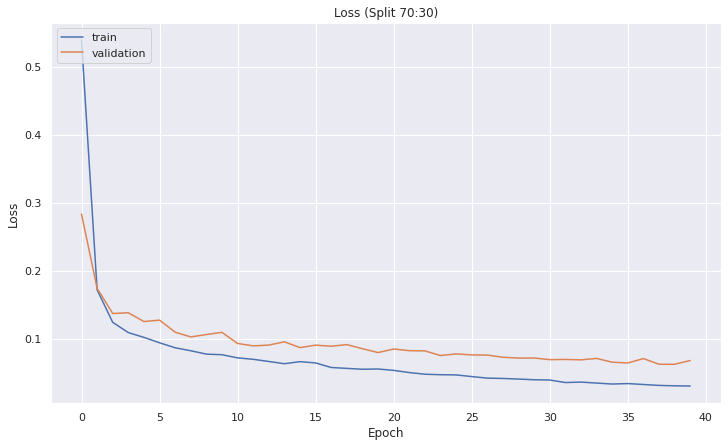

In [ ]:
# Plotting vaidation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss (Split 70:30)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 80:20

In [ ]:
model1 = Sequential()
model1.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model1.add(Dense(200, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 3,183
Trainable params: 3,183
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history1=model1.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=25, verbose=1, validation_split=0.2, callbacks = [es])
predictions = model1.predict(xval_scale)

Epoch 1/50
49/49 [==============================] - 1s 8ms/step - loss: 0.5766 - mse: 0.5766 - mae: 0.5641 - val_loss: 0.2512 - val_mse: 0.2512 - val_mae: 0.4029
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1695 - mse: 0.1695 - mae: 0.3276 - val_loss: 0.1700 - val_mse: 0.1700 - val_mae: 0.3249
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1292 - mse: 0.1292 - mae: 0.2781 - val_loss: 0.1416 - val_mse: 0.1416 - val_mae: 0.2822
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1125 - mse: 0.1125 - mae: 0.2559 - val_loss: 0.1197 - val_mse: 0.1197 - val_mae: 0.2684
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1031 - mse: 0.1031 - mae: 0.2440 - val_loss: 0.1060 - val_mse: 0.1060 - val_mae: 0.2408
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.0956 - mse: 0.0956 - mae: 0.2338 - val_loss: 0.1019 - val_mse: 0.1019 - val_mae: 0.2421
Epoch 7/50
49/49 [==========

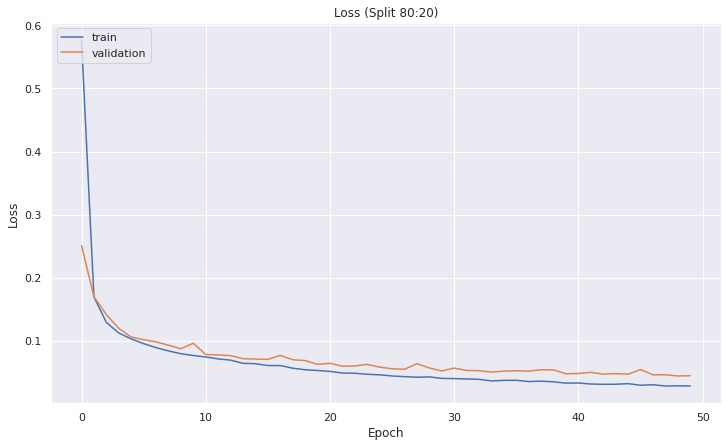

In [ ]:
# Plotting vaidation and training loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss (Split 80:20)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 60:40

In [ ]:
model2 = Sequential()
model2.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 3,183
Trainable params: 3,183
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history2=model2.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=25, verbose=1, validation_split=0.4, callbacks = [es])
predictions = model2.predict(xval_scale)

Epoch 1/50
37/37 [==============================] - 1s 10ms/step - loss: 0.6074 - mse: 0.6074 - mae: 0.5915 - val_loss: 0.3538 - val_mse: 0.3538 - val_mae: 0.4312
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1815 - mse: 0.1815 - mae: 0.3253 - val_loss: 0.1967 - val_mse: 0.1967 - val_mae: 0.3380
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1306 - mse: 0.1306 - mae: 0.2811 - val_loss: 0.1680 - val_mse: 0.1680 - val_mae: 0.3092
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1110 - mse: 0.1110 - mae: 0.2564 - val_loss: 0.1529 - val_mse: 0.1529 - val_mae: 0.2946
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 0.0995 - mse: 0.0995 - mae: 0.2416 - val_loss: 0.1415 - val_mse: 0.1415 - val_mae: 0.2771
Epoch 6/50
37/37 [==============================] - 0s 5ms/step - loss: 0.0942 - mse: 0.0942 - mae: 0.2350 - val_loss: 0.1356 - val_mse: 0.1356 - val_mae: 0.2716
Epoch 7/50
37/37 [=========

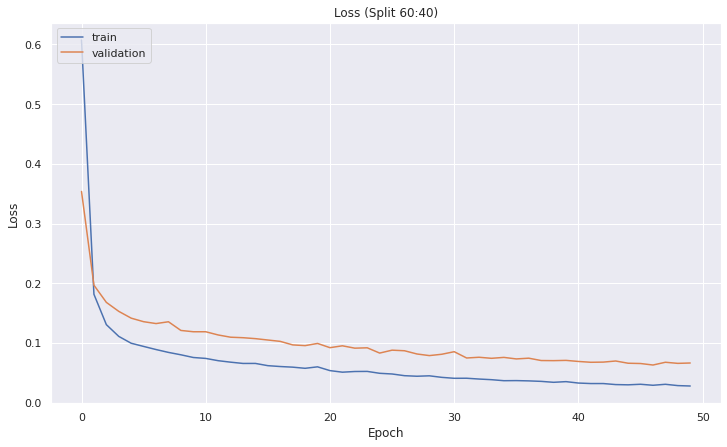

In [ ]:
# Plotting vaidation and training loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss (Split 60:40)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 90:10

In [ ]:
model3 = Sequential()
model3.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model3.add(Dense(200, activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_10 (Dense)             (None, 200)               2800      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 3,183
Trainable params: 3,183
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history3=model3.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=25, verbose=1, validation_split=0.1, callbacks = [es])
predictions = model3.predict(xval_scale)

Epoch 1/50
55/55 [==============================] - 1s 7ms/step - loss: 0.5294 - mse: 0.5294 - mae: 0.5508 - val_loss: 0.3073 - val_mse: 0.3073 - val_mae: 0.4209
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 0.1844 - mse: 0.1844 - mae: 0.3220 - val_loss: 0.1892 - val_mse: 0.1892 - val_mae: 0.3385
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 0.1381 - mse: 0.1381 - mae: 0.2829 - val_loss: 0.1503 - val_mse: 0.1503 - val_mae: 0.2902
Epoch 4/50
55/55 [==============================] - 0s 4ms/step - loss: 0.1185 - mse: 0.1185 - mae: 0.2592 - val_loss: 0.1198 - val_mse: 0.1198 - val_mae: 0.2659
Epoch 5/50
55/55 [==============================] - 0s 4ms/step - loss: 0.1064 - mse: 0.1064 - mae: 0.2425 - val_loss: 0.1108 - val_mse: 0.1108 - val_mae: 0.2480
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0982 - mse: 0.0982 - mae: 0.2324 - val_loss: 0.1075 - val_mse: 0.1075 - val_mae: 0.2585
Epoch 7/50
55/55 [==========

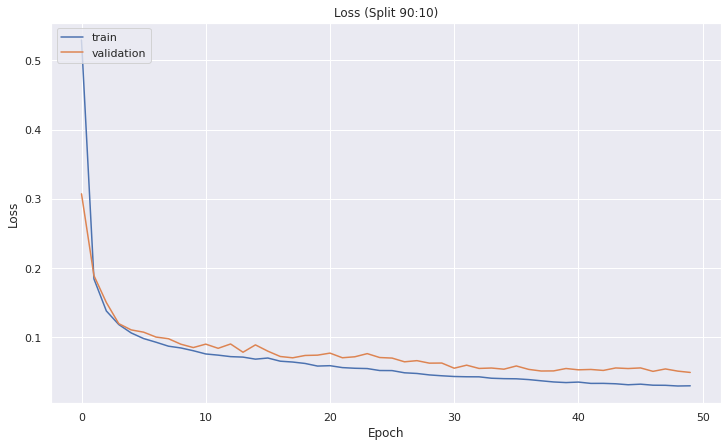

In [ ]:
# Plotting vaidation and training loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss (Split 90:10)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()